<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ACSE-7-(Inversion-and-Optimisation)" data-toc-modified-id="ACSE-7-(Inversion-and-Optimisation)-1">ACSE-7 (Inversion and Optimisation)</a></span></li><li><span><a href="#Lecture-8:-Data-Assimilation" data-toc-modified-id="Lecture-8:-Data-Assimilation-2">Lecture 8: Data Assimilation</a></span><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-2.1">Learning Objectives</a></span></li><li><span><a href="#Probability-Recap" data-toc-modified-id="Probability-Recap-2.2">Probability Recap</a></span><ul class="toc-item"><li><span><a href="#Discrete-Probability" data-toc-modified-id="Discrete-Probability-2.2.1">Discrete Probability</a></span></li><li><span><a href="#independence,-covariance-and-correlation" data-toc-modified-id="independence,-covariance-and-correlation-2.2.2">independence, covariance and correlation</a></span></li><li><span><a href="#Properties-of-the-expectation-operator" data-toc-modified-id="Properties-of-the-expectation-operator-2.2.3">Properties of the expectation operator</a></span></li><li><span><a href="#Integral-random-number-generators-for-computers" data-toc-modified-id="Integral-random-number-generators-for-computers-2.2.4">Integral random number generators for computers</a></span></li><li><span><a href="#Continuous-Probability" data-toc-modified-id="Continuous-Probability-2.2.5">Continuous Probability</a></span></li><li><span><a href="#The-Gaussian-(aka-Normal)-Distribution" data-toc-modified-id="The-Gaussian-(aka-Normal)-Distribution-2.2.6">The Gaussian (aka Normal) Distribution</a></span></li><li><span><a href="#The-multivariate-Gaussian-distribution" data-toc-modified-id="The-multivariate-Gaussian-distribution-2.2.7">The multivariate Gaussian distribution</a></span></li><li><span><a href="#Bayes-theorem" data-toc-modified-id="Bayes-theorem-2.2.8">Bayes theorem</a></span></li><li><span><a href="#The-log-normal-distribution-(*)" data-toc-modified-id="The-log-normal-distribution-(*)-2.2.9">The log-normal distribution (*)</a></span></li><li><span><a href="#The-logistic-distribution-(*)" data-toc-modified-id="The-logistic-distribution-(*)-2.2.10">The logistic distribution (*)</a></span></li><li><span><a href="#Stochastic-computation" data-toc-modified-id="Stochastic-computation-2.2.11">Stochastic computation</a></span></li></ul></li><li><span><a href="#The-Language-of-Data-Assimilation" data-toc-modified-id="The-Language-of-Data-Assimilation-2.3">The Language of Data Assimilation</a></span></li><li><span><a href="#Nudging:-The-first-data-assimilation-method-(*)" data-toc-modified-id="Nudging:-The-first-data-assimilation-method-(*)-2.4">Nudging: The first data assimilation method (*)</a></span></li><li><span><a href="#Statistical-Interpolation" data-toc-modified-id="Statistical-Interpolation-2.5">Statistical Interpolation</a></span><ul class="toc-item"><li><span><a href="#What's-the-time-when-you-have-two-clocks?" data-toc-modified-id="What's-the-time-when-you-have-two-clocks?-2.5.1">What's the time when you have two clocks?</a></span></li><li><span><a href="#The-Optimal-Interpolation-method" data-toc-modified-id="The-Optimal-Interpolation-method-2.5.2">The Optimal Interpolation method</a></span></li><li><span><a href="#The-observation-operator" data-toc-modified-id="The-observation-operator-2.5.3">The observation operator</a></span></li></ul></li><li><span><a href="#The-variational-approach,--3D-Var" data-toc-modified-id="The-variational-approach,--3D-Var-2.6">The variational approach,  3D-Var</a></span><ul class="toc-item"><li><span><a href="#Nonlinear-observation-operators" data-toc-modified-id="Nonlinear-observation-operators-2.6.1">Nonlinear observation operators</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2.6.2">Bayesian inference</a></span></li></ul></li><li><span><a href="#The-Kalman-Filter" data-toc-modified-id="The-Kalman-Filter-2.7">The Kalman Filter</a></span><ul class="toc-item"><li><span><a href="#Timestepping-&amp;-information-propagation" data-toc-modified-id="Timestepping-&amp;-information-propagation-2.7.1">Timestepping &amp; information propagation</a></span></li></ul></li><li><span><a href="#4D-Var" data-toc-modified-id="4D-Var-2.8">4D-Var</a></span><ul class="toc-item"><li><span><a href="#Temporal-aware-variational-assimilation" data-toc-modified-id="Temporal-aware-variational-assimilation-2.8.1">Temporal aware variational assimilation</a></span></li><li><span><a href="#Weak-Constraint-4D-Var-(*)" data-toc-modified-id="Weak-Constraint-4D-Var-(*)-2.8.2">Weak Constraint 4D-Var (*)</a></span></li><li><span><a href="#The-Extended-Kalman-Filter" data-toc-modified-id="The-Extended-Kalman-Filter-2.8.3">The Extended Kalman Filter</a></span></li></ul></li><li><span><a href="#The-Ensemble-Kalman-Filter-(*)" data-toc-modified-id="The-Ensemble-Kalman-Filter-(*)-2.9">The Ensemble Kalman Filter (*)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.10">Summary</a></span></li><li><span><a href="#Further-Reading" data-toc-modified-id="Further-Reading-2.11">Further Reading</a></span></li></ul></li></ul></div>

# ACSE-7 (Inversion and Optimisation)

# Lecture 8: Data Assimilation


#### James Percival (<j.percival@imperial.ac.uk>)
#### RSM 4.85

In [1]:
%%html
<style>
div.text_cell_render{
    font-size:14pt;
}
</style>

In [2]:
# some basic setup for plotting etc.

%matplotlib inline
from matplotlib import pyplot as p
import numpy as np

Weather forecasting (AKA Numerical Weather Prediction or NWP) is one topic where there is a continuous, operational need to optimize and invert from observational data in order to generate accurate initial conditions from which to run further forecasting weather models. As such it has a long and particular history of its own in generating and adopting inversion and assimilation techniques, many of them based on a probablistic understanding of error and uncertainty.

These systems tend to be run on fast turnaround cycles and at massive scale, requiring their own dedicated HPC centres. Indeed atmospheric and climate science are key drivers in the ongoing development of exascale supercomputing.

The UK is currently the home of two major European weather forcasting centres; The [UK Metereological Office](https://www.metoffice.gov.uk/) (the Met Office) in Exeter and the [European Centre for Medium-Range Weather Forecasting](https://www.ecmwf.int/) (the ECMWF) in Reading. These centres both combine advanced, large and complex mathematical models of the Earth and atmospher with a wealth of observations from weather stations, weather balloons, planes and satillites in order to generate their forecasts, with the Met Office now running on an hourly cycle for some forecast products. The techniques used to combine the numerics and observations are called _data assimilation_ methods within the industry.

## Learning Objectives

1. To revise some basic probability and statistics
2. To understand optimal/statitstical interpolation of data with known error characteristics
3. To understand the core properties of common data assimilation strategies and when it is appropriate to use them.

## Probability Recap

Since the rest of this lecture will be justified by taking a probablistic view of the universe (we cannot guarantee any particular forecast is accurate, but we believe it's possible to devise a technique to pick a forecast that will beat other possible forecasts on average), we will begin with a swift recap of some core probability theory, and of the notation used in the rest of this lecture.

### Discrete Probability

#### Probabilities, expectation, averages, variance and standard deviation

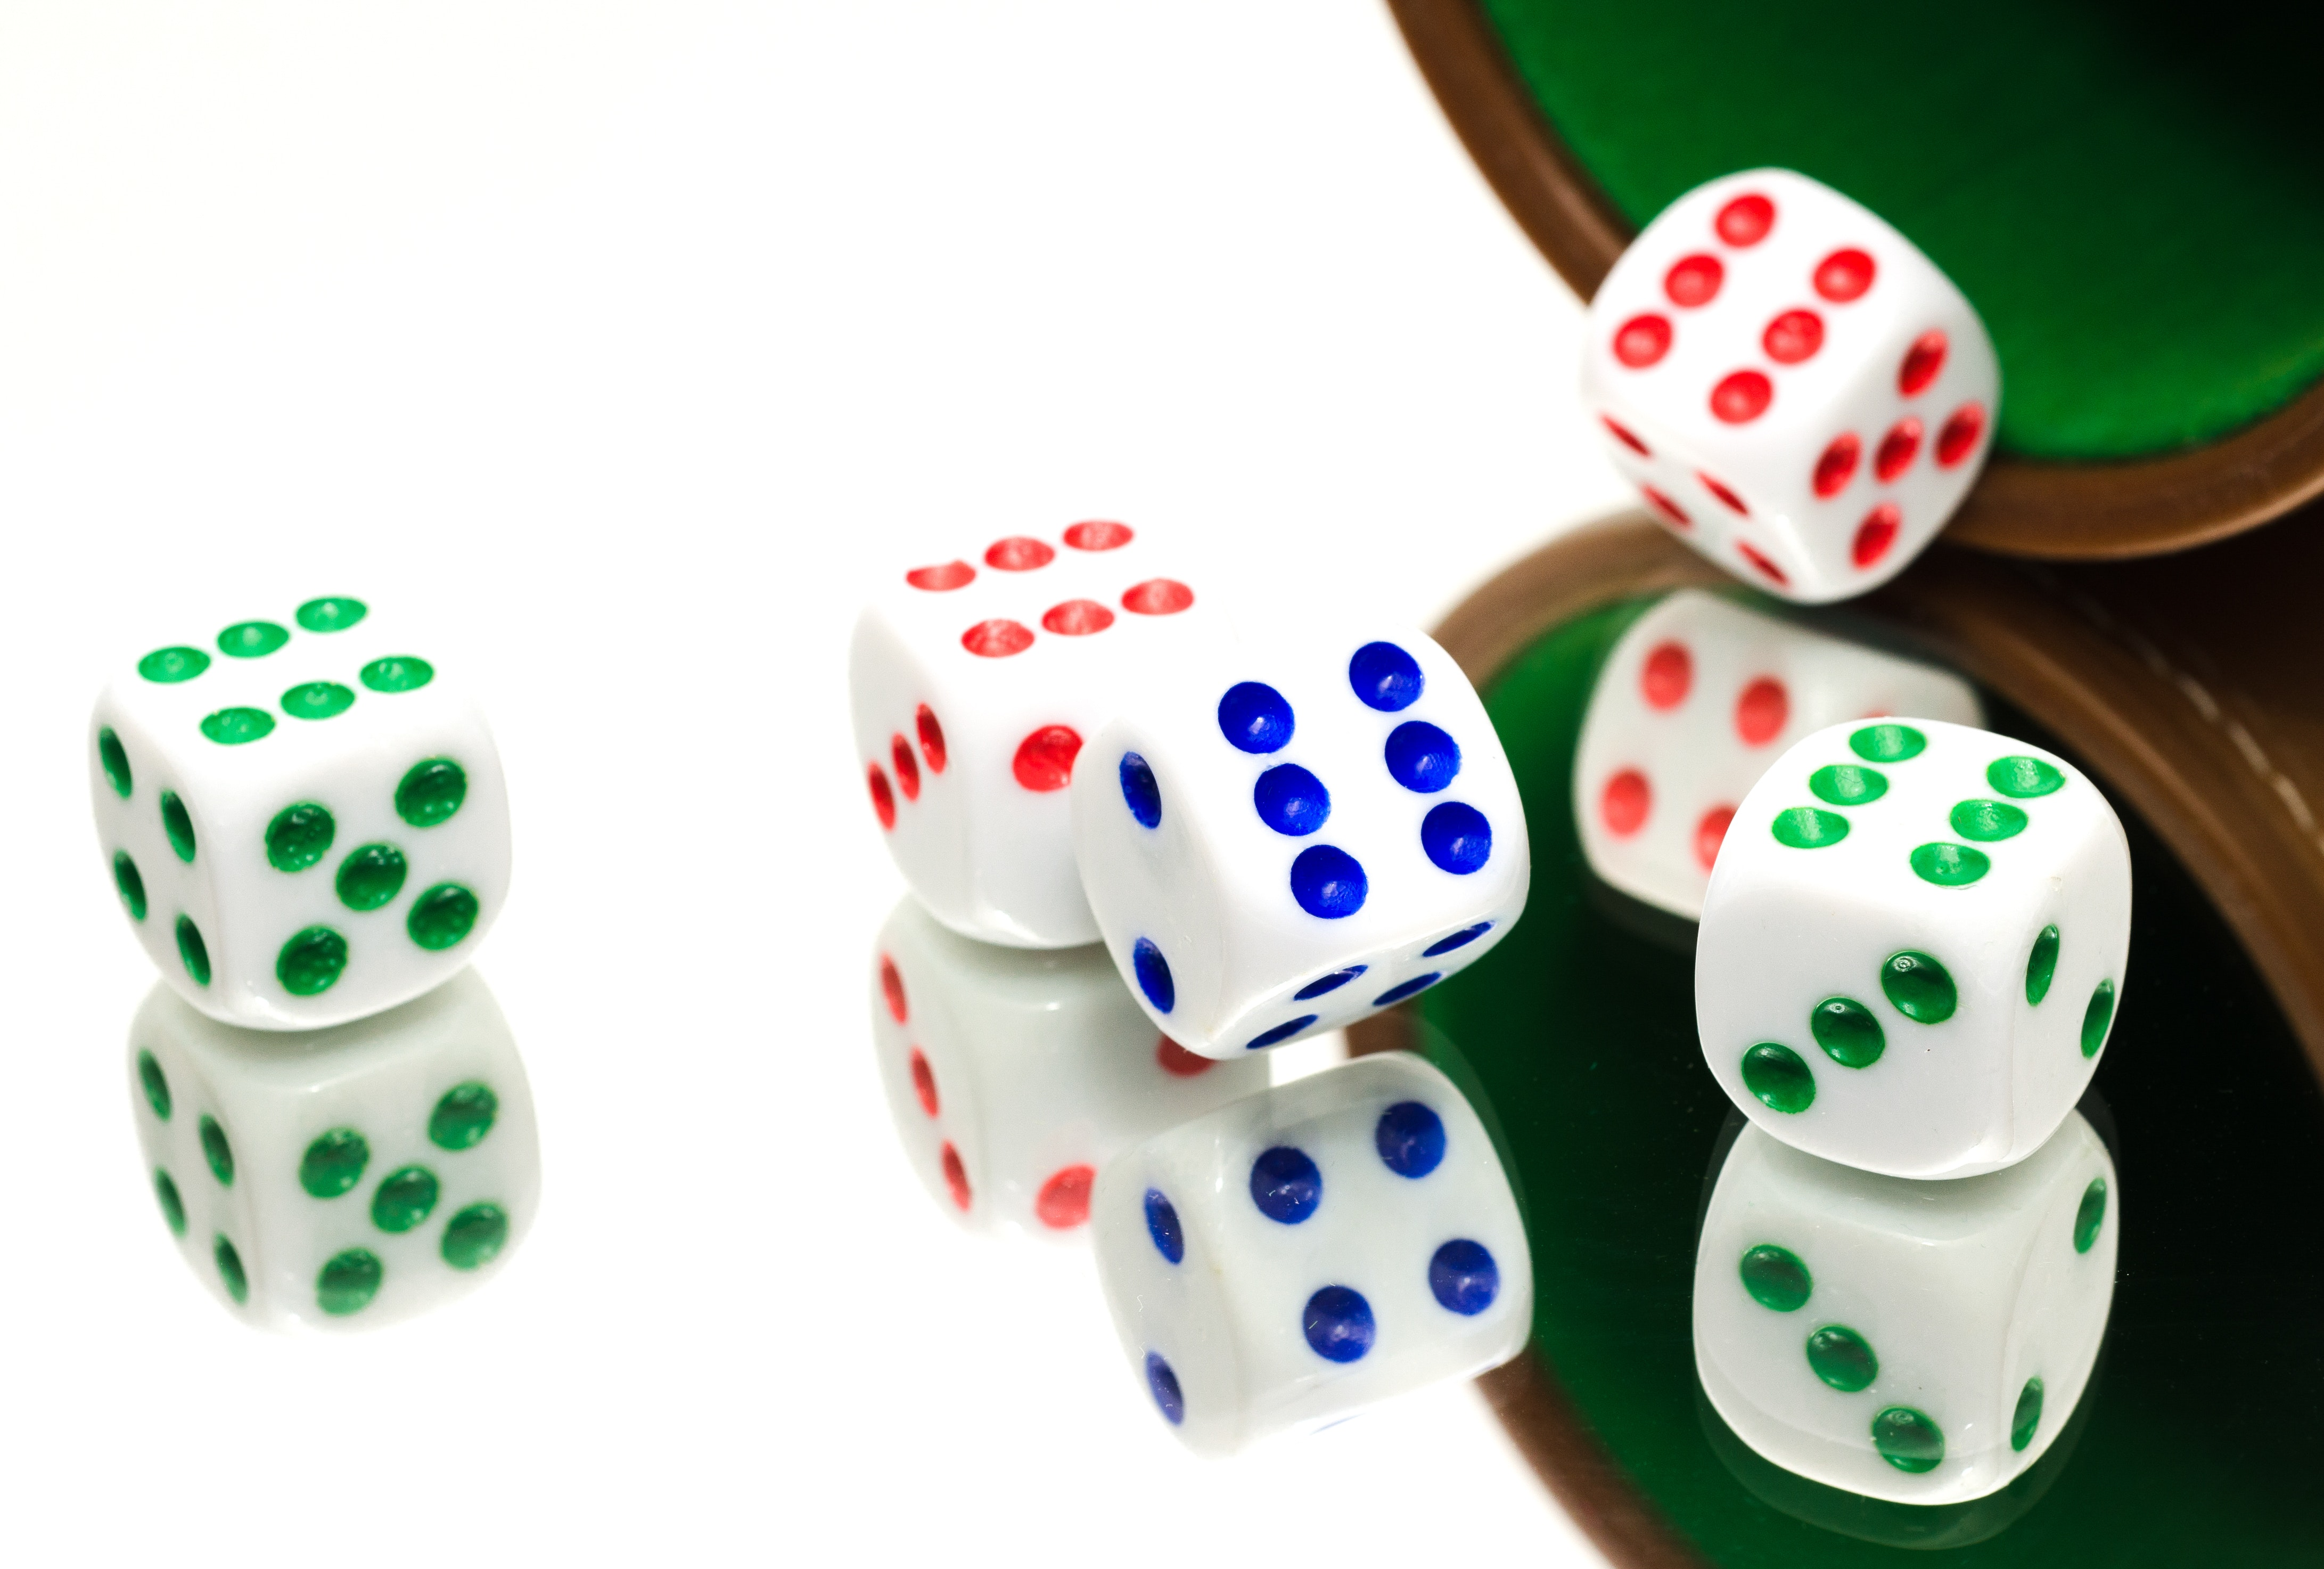

The classical definition of the probabliity of an event is the ratio of the number of cases in which the event happens over the total number of cases which could occur. So, for standard 6 sided dice we have

$$ \mbox{possible results} = \{1, 2, 3, 4, 5, 6\} $$

$$ \mbox{results divisible by 3} = \{3, 6\}$$

$$ P(\mbox{result divisible by 3}) = \frac{2}{6} \approx 0.3333 $$

More modern definitions are looser, but will always involve a number between 0 (never) and 1 (always). In some interpretations (the objectivist) this may represent cases in repeated events, in others (the subjectivist) it represents our current belief or knowledge about a single event.

With access to a computer, it's possible to attempt to test this analysis:

ratio for 1000 trials is 0.327
ratio for 1000000 trials is 0.33333390000000007


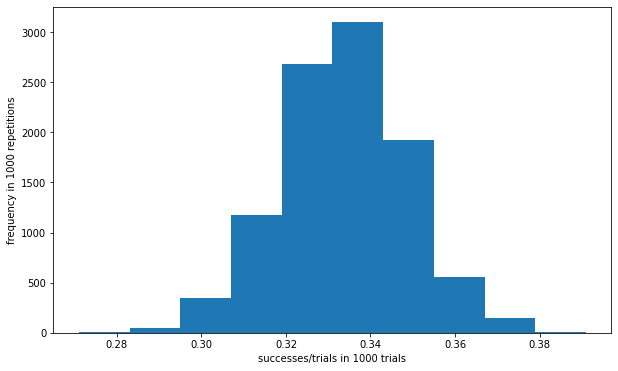

In [3]:
import random
def d6():
    """A Python implementation of a six sized dice"""
    # We could also use numpy's np.random.randint(1, 7) to vectorize better
    # note the different ways to set the endpoint
    return random.randint(1,6)

# Now to perform 1000 trials 1000 times
N = 1000
def sample():
    success = 0
    for i in range(N):
        success += (d6()%3 == 0)
    # return the ratio of successes to failures
    return success/N

# Plot the results
data = [sample() for _ in range(10000)]
print(f"ratio for 1000 trials is {data[0]}")
print(f"ratio for 1000000 trials is {np.mean(data)}")
p.figure(figsize=(10,6))
p.hist(data)
p.xlabel('successes/trials in 1000 trials')
p.ylabel('frequency in 1000 repetitions');


Given knowledge of a random variable's propability distribution (i.e. the probability for every value it can take) we can define the *expected value* or *expectation* of an event with a numerical value, $X=x$, as

$$E(f(X)) := \sum_{\mbox{possible values}} f(x) P(X=x)$$

so, using the information above $E(\mbox{dice value}) = \sum_{x=1}^6 \left[x \cdot \frac{1}{6}\right]= \frac{1+2+3+4+5+6}{6}= 3.5 $ 

You may have noticed that $E(X)$ is also the mean value, $\mu_X$, of the random variable $X$ (effectively by definition). Let's now work out $E(X^2)$ for regular six-sided dice:

$$E(X^2) = \sum_{x=1}^6 x^2 \cdot \frac{1}{6}= \frac{1+4+9+16+25+36}{6} = \frac{91}{6}$$

by itself, this is not very enlightening. However, we can think about another set of dice with face values $\{-2.5,-1.5,-0.5,0.5,1.5,2.5\}$ (i.e. a normal one, but subtracing the usual mean . Then the mean of this new die is 0 and $E(X^2)=\frac{35}{12}$. Notice that $\frac{35}{12}$ is $ \frac{91}{6}- (3.5)^2$. This quantity,
$$ \sigma^2_X:=E(x^2) -\left(E(x)\right)^2$$ 
is called the *variance*, and is a very useful measure for the "spread" or "width" of a distribution around its mean.

Further moments, (i.e functions of  $E(x^3)$ etc) can be calculated, but are very rarely used in practice.

As shown in the code block above, given a large number of trials the probability of an event can itself be estimated by

$$ P(X) \approx \frac{\mbox{number of successes in sample}}{\mbox{number of elements in sample}}$$
The result of this rule for generating an estimate of a statistical quantity is called an _estimator_. Similarly the mean (or expected) value of the event can be estimated by

$$\sigma{\mu} \approx \frac{\sum \mbox{sample values}}{\mbox{number of samples}} .$$

Given these formulae, you might think that the variance can simply be estimated by 

$$\tilde{\sigma}^2_n \approx \frac{\sum \mbox{sample values}^2}{\mbox{number of samples}} - \left(\frac{\sum \mbox{sample values}}{\mbox{number of samples}}\right)^2 ,$$

in fact this estimate will actually tend to be too small, and thus represents an "unfair" or _biased_ estimator for the variance. We would usually prefer an unbiased estimator, i.e. one with $E(\tilde{\sigma}^2)=\sigma^2$. It turns out that
{$$\tilde{\sigma}^2_{n-1} \approx \frac{\sum \mbox{sample values}^2}{\mbox{number of samples}-1} - \frac{\left(\sum \mbox{sample values}\right)^2}{(\mbox{number of samples})(\mbox{number of samples}-1)} $$
will be an unbiased fit, even if its average error may be larger than the biased version.

Text(0, 0.5, 'likelihood')

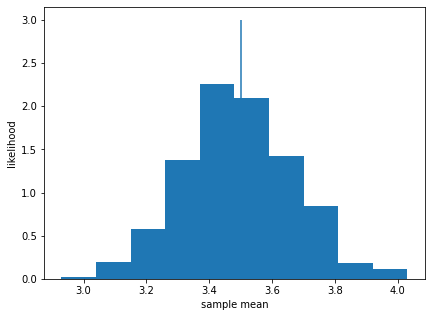

In [4]:
mu = []
var_biased = []
var_unbiased = []

for _ in range(1000):
    n_samples = 100
    data = np.array([d6() for i in range(n_samples)])
    
    mu.append(np.sum(data)/n_samples)
    var_biased.append((np.sum((data-mu[-1])**2)/n_samples))
    var_unbiased.append((np.sum((data-mu[-1])**2)/(n_samples-1)))

p.figure(figsize=(15,5))
p.subplot2grid((1, 2), (0, 0))
p.hist(mu, density=True)
p.vlines(3.5, 0, 3)
p.xlabel('sample mean')
p.ylabel('likelihood')


### independence, covariance and correlation

If we roll two dice, the value on one is not affected by the value on the other. On the other hand, the value on the bottom of dice is entirely determined by the value shown on the top. We can make this more rigourous by defining, that the probability of $X=x$ and $Y=y$, written as 
$ P(X=x \cap Y=y)$ or just $P(x\cap y)$, satisfies
$$ P(x\cap y) = P(x)P(y) $$.

When variables are interdependent, we can quantify the extent through the *covariance* operator,
$$ \mbox{cov}(X, Y) = E \left((X-\mu_X)(Y-\mu_Y)\right) = E(XY)-\mu_X\mu_Y$$
or the correlation coefficient,
$$ \mbox{corr}(X, Y) = \frac{\mbox{cov}(X,Y)}{\sigma_X, \sigma_Y}.$$
When variables behave in the same way, the correlation coefficient is 1, when variables act precisely opposite, the correlation coefficient is -1. Note that
$$ \tag{Cauchy-Cauchy–Bunyakovsky–Schwarz}\mbox{cov}(X, Y)^2 \leq \sigma_X^2 \sigma^2_Y $$
so that those values represent bounds on the correlation coefficient. 

 
### Properties of the expectation operator

Constant parameters have an expectation equal to their value, i.e. they behave as random variables which only take one value 100% of the time,

$$ E(1) = 1 .$$

The expectation of a sum of random variables is the sum of the expectations,

$$\mu_{X+Y}:= E(X+Y) = E(X) + E(Y) = \mu_X+\mu_y.$$
This can be riguously proved by re-writing this as summations, then using identities such as  $\sum_{i,j} i+j =\sum_{i} i + \sum_{j} j$, $\sum_{x}\sum f(x)g(x,y)=\sum_{x}\left[ f(x)\sum{y}g(x,y)\right]$ and $\sum_y P(y\vert x) =1$, but for this course you may simply accept that it is true. To put this identity in mathematical language, the expectation operator is _distributive_ over addition. Expectation also comutes with scalar multiplication,

$$ E(aX) = aE(X),$$

Again, this can be proved by going back to summations. Together this means that the expectation operator is linear in its input.

The variance of a sum of dependent random variables is **not** generally the  sum of the variances (although it is true fo the special case of independent variables). In the more general case
$$\begin{eqnarray*}\sigma^2_{X+Y} =& E\left((X+Y)^2) -E(X+Y)^2\right)\\
=& E(X^2)- E(X)^2 +2E(XY)-2E(X)E(Y) + E(Y^2)-E(Y)^2 \\
=& \sigma_X^2 +2\mbox{cov}(X, Y) + \sigma_y^2.
\end{eqnarray*}$$

If $X$ and $Y$ are independent variables then $E(XY) = E(X)E(Y)$. This can be true for dependent variables, but isn't generally.

For a function of a random variable, $f(X)$ we have the identity
$$E(f(X)) = \sum_x f(x) P\left(X=x\right),$$
which is subtly different from the _definition_
$E(f(X)) := \sum_{f(x)} f(x) P\left(f(X)=f(x)\right)$

 
### Integral random number generators for computers

Methods to generate random numbers on computers can be seperated into two families:

 1. Pseudo-random (or deterministic) random number generators (PRNGs)
 2. Hardware (or true) random number generators (TRNGs)

The first family apply fixed mathematical formulae to produce a sequence of numbers from a specified starting point. These are random in the sense of "hard to guess", but the same set of numbers can be generated multiple times by different pople.

The second family use data from external physical processes (and/or humans) to produce their sequences. This makes them "unrepeatable", even with full knowledge of previous numbers in the sequence, which has advantages and disadvantages.

Early random number generators tended to be based on linear congruential generators (LNG), i.e. formulas with a characteristic form
$$ I_{n+1} = aI_n +c\quad (\mbox{modulo } m). $$
LNGs are now well known to be unsafe for use in isolation, but for fun, lets implement one of the more infamously bad ones to be seen in the wild.

[65539, 393225, 1769499, 7077969, 26542323, 95552217, 334432395, 1146624417]
[131078, 786450, 3538998, 14155938, 53084646, 191104434, 668864790, 145765186]


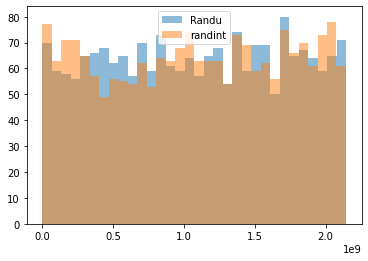

In [5]:
class Randu:
    """A python implementation of the IBM RANDU LNG.
    Never use this for anything non-trivial"""
    
    def __init__(self, seed=1):
        
        self._I = seed
        
    def __call__(self):
        self._I = (65539*self._I)%(2**31)
        return self._I
        
# One example of "badness", odd 
randu= Randu(1)
data = [randu() for _ in range(8)]
print(data)
randu= Randu(2)
data = [randu() for _ in range(8)]
print(data)
randu_data = [randu() for _ in range(2**11)]
random_data = [random.randint(0,2**31-1) for _ in range(2**11)]
p.hist(randu_data, 32, alpha=0.5, label='Randu')
p.hist(random_data, 32, alpha=0.5, label='randint')
p.legend();

This is obviously not a brilliant sequence (not least, for a given seed it is always either odd or even), but compared to `randint`, it appears to do a reasonable job in terms of probability density with wide bins. Unfortunately there a some deeper problems with `Randu`, which we will revisit later.

### Continuous Probability

#### The Cumulative Distribution Function

Rather than a set of dice, giving integer values, think about trying to pick a real number, $x$, say between 0 and 4, with all numbers having equal chance. The actual probability of picking any particular number is effectively zero (since virtually every real number isn't that one) . However, there should obviously be a 50-50 chance that $x$ is less than 2 or greater than 2 (  i.e. $P(x\leq 2)=0.5$ )and a one in four ($0.25$) chance that $x\leq 1$. Generalizing this, we can come up with a formula
$$ P(x<z)= \left\{\begin{array}{cc}
0& z<0,\\
\frac{z}{4}& z\leq 0<4,\\
1 & z\geq4.
\end{array}\right.
$$

This is the *cumulative distribution function* (CDF) of our continuous variable.

Text(0, 0.5, '$P(X<x)$')

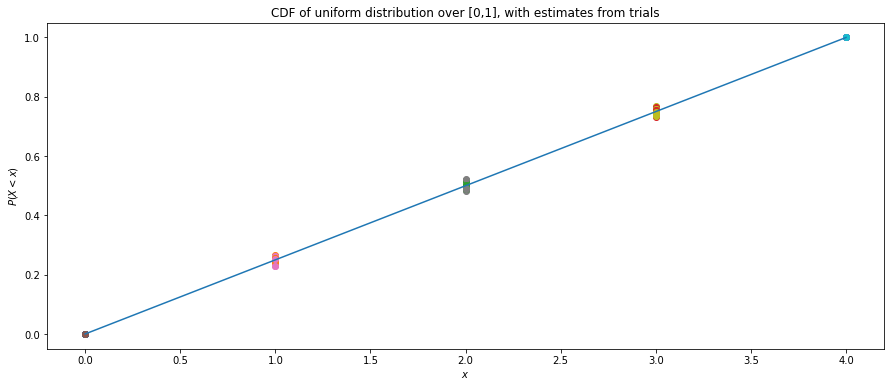

In [6]:
# Plot the CDF of a uniform distribution, along with some samples

p.figure(figsize=(15,6))
N = 2000
X = np.random.uniform(0,4,(20, N))

for x in X:
    for y in [0, 1, 2, 3, 4]:
        p.scatter(y,sum(x<y)/N)
        
p.plot([0,4],[0,1])
p.title('CDF of uniform distribution over [0,1], with estimates from trials')
p.xlabel('$x$')
p.ylabel('$P(X<x)$')

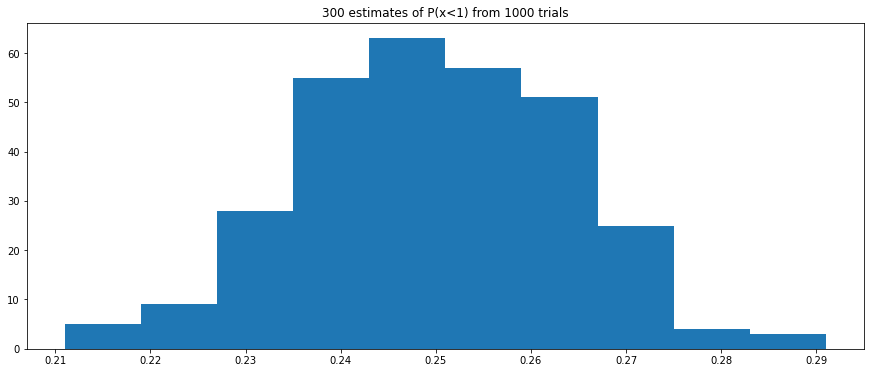

In [7]:
# Do some estimation of probability

N1 = 300
N2 = 1000
p.figure(figsize=(15,6))
X = np.random.uniform(0,4,(N1, N2))
p.title(f'{N1} estimates of P(x<1) from {N2} trials')
p.hist(np.sum(X<1.0, axis=1)/N2);

#### Probability density functions

For sufficiently smooth probability distributions,we may write our CDF as an integral

$$P(X<z) = \int^z_{-\infty} p(x) dx $$ or in a (basically) equivalent form,

$$ p(x) = \frac{dP(X<z)}{dz}.$$

This $p(x)$ is the *probability density function* (PDF) of the distribution. Many well known probability distributions can be written this form, including the uniform distribution. 

(0.0, 4.0, 0.0, 1.0)

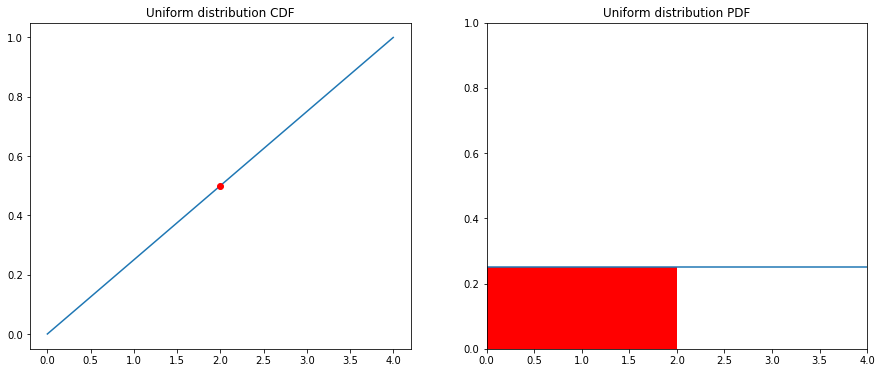

In [8]:
# Plot the CDF and PDF for the uniform distribution
p.figure(figsize=(15, 6))
# CDF
p.subplot2grid((1, 2), (0, 0))
p.plot([0, 4], [0, 1])
p.title('Uniform distribution CDF')
p.plot([2],[0.5], 'ro')
#PDF
p.subplot2grid((1, 2), (0, 1))
p.plot([0, 4], [0.25, 0.25])
p.title('Uniform distribution PDF')
p.fill_between([0,2], [0.25, 0.25], fc='r')
p.axis([0,4,0, 1.0])

### The Gaussian (aka Normal) Distribution

The Gaussian distribution (in many circumstances also called the "normal distribution") has a distribution function given as

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2} \right) $$

This is the classic "bell-curve" or "hump" distribution, with the likelihood strongly (but smoothly) clumped around the mean $\mu$, decaying with a variance $sigma^2$ towards zero at $\pm\infty$.

(-4.0, 4.0, 0.0, 1.0)

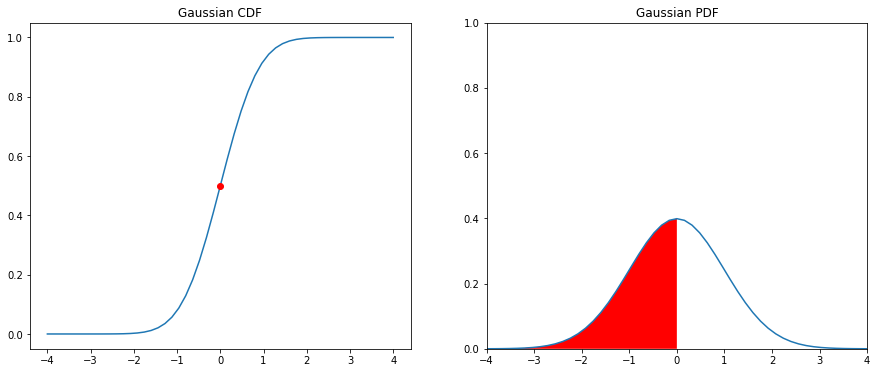

In [9]:
# Plot the CDF and PDF for the Gaussian distribution
from scipy.special import erf

p.figure(figsize=(15, 6))
# CDF
p.subplot2grid((1, 2), (0, 0))
x = np.linspace(-4,4, 51)
p.plot(x, 0.5*(1+erf(x)))
p.title('Gaussian CDF')
p.plot(0, 0.5*(1.0+erf(0)), 'ro')
#PDF

def p_x(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

p.subplot2grid((1, 2), (0, 1))
p.plot(x, p_x(x))
p.title('Gaussian PDF')
p.fill_between(x[:26], p_x(x[:26]), fc='r')
p.axis([x.min(), x.max(), 0, 1])

Unusually, if $X$ is a Gaussian random variable, with mean $\mu_x$ and variance $\sigma_X^2$, and $Y$ is another independent Gaussian random variable, with mean $\mu_Y$ and variance $\sigma_Y^2$, then $Z=X+Y$ also follows a Gaussian distribution, with mean $\mu_X+\mu_Y$ and variance $\sigma_X^2 +\sigma_Y^2$. While the last two properties are not a total surprise (see the section above on the algebra of random variables), it is uncommon for a combination of variables from a given distribution to generate a variable from the same distribution.

For this reason, along with other similar ones, the normal distribution is often used as an approximation for real world data, especially when the uncertaintities are generated from multiple independent sourcces. This can be true even when the original uncertainties are discrete. For a coded example, we return to our dice:

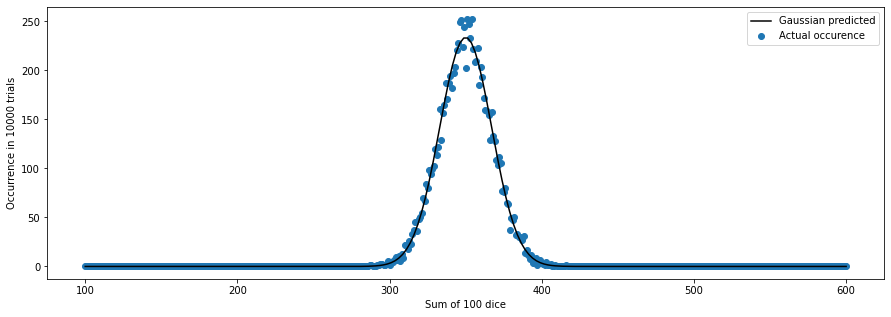

In [10]:
totals = np.zeros(501)

# we'll toss 100 dice 10000 times, summing the total each time

values = np.random.randint(0, 6, size=(10000, 100)) + 1

for v in values:
    totals[sum(v)-100] += 1
    

p.figure(figsize=(15,5))
p.scatter(range(100,601), totals, label='Actual occurence')

x = np.linspace(100, 600, 200)
p.plot(x, 10000/np.sqrt(2*np.pi*100*35/12)*np.exp(-(x-350)**2/(2*(100*35/12))), 'k', label='Gaussian predicted')
p.xlabel('Sum of 100 dice')
p.ylabel('Occurrence in 10000 trials')
p.legend();

### The multivariate Gaussian distribution

Let's extend our world from a one dimensional continuous random variable, $X$,  to a two dimensional one, $ \mathbf{X} = {X, Y}$. Our Cumulative distribution function now becomes a joint probability, $F_\mathbf{X}=P(X\leq x, Y\leq y)$, where the comma should be taken as implying both the first statement *and* the second are true. Given a CDF, it's natural to look for a probability density function such that
$$ P(X\leq x, Y\leq y) = \int_{-\infty}^x \int_{-\infty}^y p_{\mathbf{X}}(x',y') dy\,dx, $$
or equivalently
$$ p_{\mathbf{X}} = \frac{\partial^2 F_\mathbf{X}}{\partial x\partial y}.$$
If the variables $X$ and $Y$ are **independent** and have probability density functions $p_X(x)$ and $p_Y(y)$, we can write

$$\begin{eqnarray*}
P(X\leq x, Y \leq y) &= P(X\leq x) P(Y\leq y),\\
&=\int^x p_X(x') dx' \int^y p_Y(y') dy',
&=\int_{-\infty}^x \int_{-\infty}^y p_X(x')p_Y(y') dy\,dx.
\end{eqnarray*}
$$

Hence for independent variables $p_{\mathbf{X}}(x,y) = p_x(x)p_y(y)$. When the variables are correlated this usually becomes more difficult. However, for Gaussian distributions we know that we have an advantage. Sums of Gaussian distributions are still Gaussian, so we can look for a comination of the $\mathbf{X}$ which happens to be independent. Define the covariance matrix of $\mathbf{X}$,

$$\mathbf{M}_\mathbf{X}:= E([\mathbf{X}-E(\mathbf{X}][\mathbf{X}-E(\mathbf{X})]) = \left(\begin{array}{cc}
\mbox{var}(X)& \mbox{cov}(X,Y)\\
\mbox{cov}(Y,X)& \mbox{var}(Y)
\end{array}
\right)
$$

we seek a matrix $\mathbf{L}$ defining a transformation, $\mathbf{Z}=\mathbf{L}\mathbf{X}$ such that the covariance matrix of $\mathbf{Z}$ is diagonal. Substituting into the definition above we find $\mathbf{M}_\mathbf{Z} = \mathbf{L}\mathbf{M}_\mathbf{X}\mathbf{L}^T$. Since $\mathbf{M}_\mathbf{X}$ is a symmetric real matrix we should know a diagonal decomposition $\mathbf{M} = \mathbf{V}\mathbf{D}\mathbf{V}^T$, where $\mathbf{V}$ is orthonormal (i.e. $\mathbf{V}^T = \mathbf{V}^T$). So we can pick $\mathbf{L} = \mathbf{V}^T$ and we are done. As a bonus the transformation has determinant equal to 1, so we don't need to fiddle with the integral and can write

$$p_\mathbf{Z}(\mathbf{z}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma_{i}^2}}\exp\left(-\frac{(z_i-\mu_i)^2}{\sigma_i^2}\right)=\frac{1}{\sqrt{(2\pi)^n\det(\mathbf{D})}}\exp\left(\frac{(\mathbf{z}-\mathbf{\mu}_\mathbf{z})^T\mathbf{D}^{-1}(\mathbf{z}-\mathbf{\mu}_\mathbf{z})}{2}\right).$$

Substituting back into $x$ variables we get the final form,

$$p_\mathbf{X}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^n\mbox{det}(\mathbf{M}_{\mathbf{X}})}} \exp\left(-\frac{(\mathbf{x}-\mathbf{\mu})^T\mathbf{M}_\mathbf{X}^{-1}(\mathbf{x}-\mathbf{\mu})}{2}\right).$$

### Bayes theorem

In general, given two random variables the probability of the event $A$ and $B$ (sometimes also written $P(A\cap B)$ can be thought of in two ways:
1. B happens, and given B happened, A also happens.
2. A. happens and given A happend, B also happens.

The probability of the new event "given B happened, A happened", written $P(A \vert B)$ is independent of the probability $B$ (since B has already happened), so using the formula for independent events

$$ P(A\cap B) = P(A\vert B) P(B).$$

Similarly, calculating things the other way round we have

$$ P(A\cap B) = P(B\vert A) P(A).$$

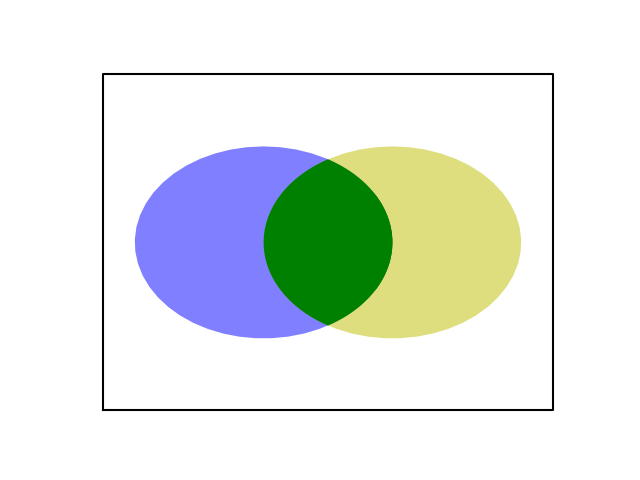

For those who like graphical proofs, the area of the green segment,$P(A\cap B)$ is equal to the area of the blue circle, $P(B)$,times the ratio of the green segment to the blue circle $P(A\vert B)$, and similarly for the yellow circle.

Putting this together, and making the basic assumption that $P(A) \neq 0$, we get Bayes' Theorem,

$$\tag{Bayes' Theorem} P(B \vert A) = \frac{ P(A \vert B) P(B) }{P(A)}. $$ 

We will return to this identity later in the lecture.


<div class="alert-info">

### The log-normal distribution (*)

Another common distribution related to the Gaussian distribution is the *log-normal* distribution. This is a two parameter distribution generating numbers the range $(0,\infty)$ where the natutal logarithm of the variable, $\log(X)$ or $\ln X$, is normally distibuted. The parameters for the model are usual taken as the mean, $\mu$, and standard deviation, $\sigma$, of the normal distribution of the logarithms. The propability density function is
$$ p(x) = \frac{1}{x\sigma\sqrt{2\pi}}\exp\left(-\frac{[\log(x)-\mu]^2}{2\sigma^2}\right),$$

and the cumulative distribution function is

$$ \frac{1}{2}\left[1+\mbox{erf}\left(\frac{\log x - \mu}{\sigma\sqrt{2}}\right)\right]. $$
    
where $\mbox{erf}$ is the ["error function"](https://mathworld.wolfram.com/Erf.html).
    
    
### The logistic distribution (*)
    
A distribution which you'll revisit in the machine learning course is the logistic distribution, a two parameter distribution over the real numbers,
    
$$p(x)= \frac{1}{4\sigma}\mbox{sech}^2\left(\frac{x-\mu}{2\sigma}\right)=\frac{1}{\exp\left(\left[\frac{x-\mu}{2\sigma}\right)+\exp\left(-\frac{x-\mu}{2\sigma}\right)\right]^2}.$$
    
The associated cumulative density function is the logistic function,
    
$$ F(x) = \frac{1}{2} +\frac{1}{2}\tanh\left(\frac{x-\mu}{2\sigma}\right).$$

This function "turn on" around $\mu$ and rapidly switches from near zero to near one. The width of the "fuzzy" section is controlled by $\sigma$.
    
</div>

(0.01, 4.0, 0.0, 1.0)

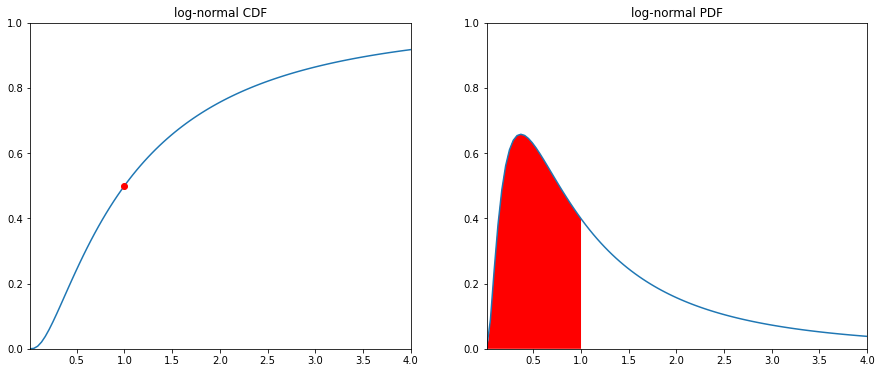

In [11]:
# Plot the CDF and PDF for the Gaussian distribution
from scipy.special import erf

p.figure(figsize=(15, 6))
# CDF
p.subplot2grid((1, 2), (0, 0))
x = np.linspace(0.01,4, 101)
p.plot(x, 0.5*(1+erf(np.log(x)/np.sqrt(2))))
p.title('log-normal CDF')
p.plot(1, 0.5*(1.0+erf(0)), 'ro')
p.axis([x.min(), x.max(), 0, 1])
#PDF

def p_x(x):
    return 1/x/np.sqrt(2*np.pi)*np.exp(-np.log(x)**2/2)

p.subplot2grid((1, 2), (0, 1))
p.plot(x, p_x(x))
p.title('log-normal PDF')
p.fill_between(np.linspace(0.01,1), p_x(np.linspace(0.01,1)), fc='r')
p.axis([x.min(), x.max(), 0, 1])


Due to one of the laws of logarithms,

$$ \log(ab) = \log(a)+\log(b), $$
the product of log-normal distributions is log-normally distributed and the distribution can approximate the limit of products of other distritions, just as Gaussians predict their sum.

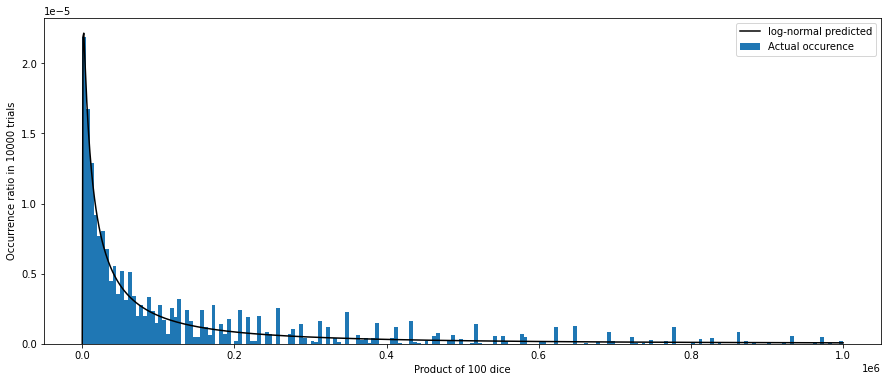

In [12]:
# we'll toss 10 dice 10000 times, taking the product of the totals each time


totals = []
values = np.random.randint(0, 6, size=(10000, 10)) + 1

for v in values:
    prod = 1
    for _ in v:
        prod *= _
    totals.append(prod)


# plot a histogram of the 
p.figure(figsize=(15,6))
p.hist(totals, bins=200, range=(0, 1e6), density=True, label='Actual occurence')

x = np.linspace(0.1, 1e6, 1000)
p.plot(x, 1/x/np.sqrt(2*np.pi*3.65)*np.exp(-(np.log(x)-10.9654)**2/(2*(3.65))), 'k', label='log-normal predicted')
p.xlabel('Product of 100 dice')
p.ylabel('Occurrence ratio in 10000 trials')
p.legend();

#### Continuous expectations

The expectation formula for a continuous random variable, $X$, replaces the sum over possible discrete values with an integral over the range of possible continuous value and weighting by the event probability with weighting with the event PDF,

$$ E(X) = \int_{-\infty}^{\infty} x p(X=x) dx. $$
Similarly the variance is now

$$ E(X^2)-E(X)^2 =  \int_{-\infty}^{\infty} x^2 p(X=x) dx - \left( \int_{-\infty}^{\infty} x p(X=x) dx \right)^2 $$


### Stochastic computation
#### Getting samples for the continuous uniform distribution

Virtually all modern programming languages at least provide a method of obtaining samples of (distretizations of) the uniform distribution over $[0,1]$. Sometimes the implementation is something as simple as the following (usually replacing RANDU with a better behaved integral random number generator of course).

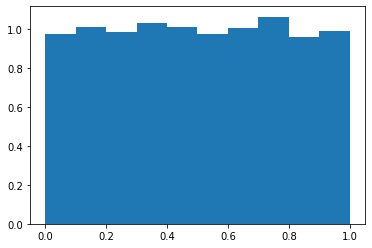

In [13]:
class RealRandu(Randu):
    """Real uniform random number generator based on RANDU."""

    def __call__(self):
        super().__call__();
        return self._I/(2**31)
    
randr = RealRandu()
data = [randr() for _ in range(9999)]
p.hist(data, density=True);
    

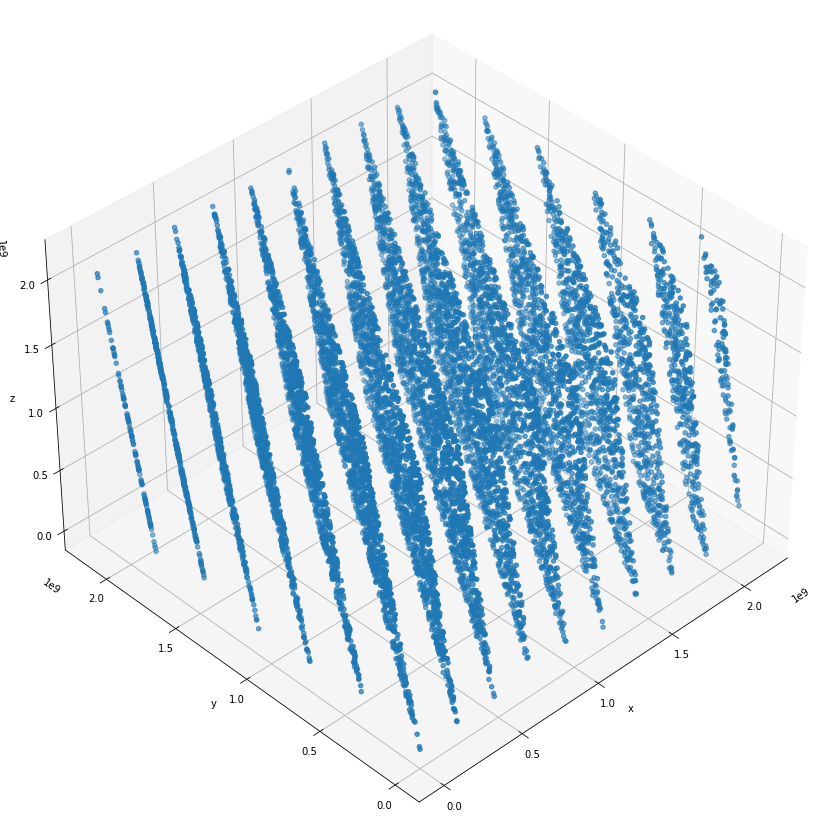

In [14]:
from mpl_toolkits.mplot3d import Axes3D
rand = Randu(1)
data = [rand() for _ in range(39999)]

data = np.array(data).reshape((len(data)//3, 3)).T

fig = p.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*data)

ax.azim = -134
ax.elev =38
ax.xaxis.set_label_text('x')
ax.yaxis.set_label_text('y')
ax.zaxis.set_label_text('z');

While robust and easy to implement, this approach can interact badly with floating point arithmatic under some circumstances.

#### The Box Mueller transformation

To return to an earlier point, for an arbitrary function of random variables, the input distribution doesn't have to be directly related to the output distribution. As a mild example, we can generate two numbers drawn from the Gaussian distribution from two numbers, $a$ & $b$, drawn from the uniform distribution on $[0, 1]$, using the Box-Muller transformation,
$$ n_1 \sim  \mathcal{N}(0, 1) = \sqrt{-2\log a} \sin(b), \quad
n_2 \sim \mathcal{N}(0, 1) = \sqrt{-2\log a} \cos(b). $$

This (and other similar tricks) can be useful in programming languages (such as C, though not  C++) which only provide uniform random variables in standard libraries. Watch out that some transformations are known to expose bad behaviour in pseudorandom number generators.

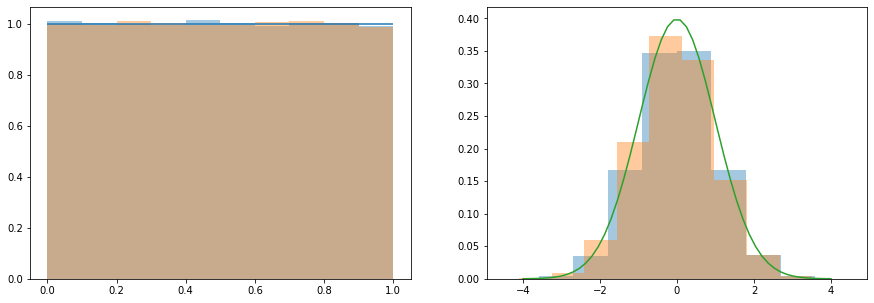

In [15]:
# A python demonstration of the Box-Muller algorithm

def box_muller(a, b):
    r = np.sqrt(-2*np.log(a))
    theta = 2*np.pi*b
    return r*np.sin(theta), r*np.cos(theta)


N = 100000
a = np.random.uniform(size=N)
b = np.random.uniform(size=N)

p.figure(figsize=(15,5))

p.subplot2grid((1, 2), (0, 0))
p.hist(a, density=True, alpha=0.4)
p.hist(b, density=True, alpha=0.4)
p.hlines(1.0, 0.0, 1.0)

n1, n2 = box_muller(a, b)

p.subplot2grid((1, 2), (0, 1))
p.hist(n1, density=True, alpha=0.4)
p.hist(n2, density=True, alpha=0.4)
x = np.linspace(-4, 4)
def p_x(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
p.plot(x, p_x(x));

## The Language of Data Assimilation

As with many subfields in optimization & inversion, Data Assimilation has collected its own notation, although it is not always followed. This issue has been considered serious enough that at least one paper has been published, just consisting of a set of standard notation for other authors to use. To make following references as easy as possible, we will attempt to follow it here:

$$ \mathbf{x} : \mbox {vector of state variables (i.e. variables as used inside numerical model}$$
$$ \mathbf{x_b} : \mbox {Background state (i.e. starting guess)}$$
$$ \mathbf{x_a} : \mbox {Analysis state (i.e. final guess)}$$
$$ \mathbf{y} : \mbox{vector of  observations, effectively the same as Matt's } \mathbf{d}$$
$$ \mathbf{H}, h: \mbox{ linear or nonlinear observation operator}$$
$$ \mathbf{M}, m: \mbox{ linear or nonlinear forward model (a.k.a forecast model)}$$
$$ \mathbf{B}: \mbox{Background error covariance matrix}$$
$$ \mathbf{P}: \mbox{Analysis error covariance matrix}$$
$$ \mathbf{R}: \mbox{Observation error covariance matrix}$$

<div class="alert, alert-info">
    
## Nudging: The first data assimilation method (*)
    
[Early data assimilation methods](https://journals.ametsoc.org/doi/abs/10.1175/1520-0493%281976%29104%3C1551%3ATIONMB%3E2.0.CO%3B2) tended to work based on comparing direct observations of the variables being simulated (e.g. for a numerical weather model, temperatures and pressures) against the calculated model values. This difference was then applied as a forcing in the discretization of the PDE for that variable. So, for a variable $x$ with a physical equation
$$ \frac{\partial x}{\partial t} = f(\mathbf{x})$$
and an equivalent observation, $y$ we might write
$$ \frac{\partial x}{\partial t} = f(\mathbf{x}) +\frac{\alpha}{\Delta t}(y-x), $$
for some relaxation parameter $\alpha<1$. 

It was rapidly found that this approach tended towards making numerical weather models significantly more unstable, as well as creating self-supporting artificial circulation patterns when variable such as surface temperature were assimilated. As such the forecasts became neither more realistic nor more accurate.
    
Instead, as the science of data assimilation has progressed, statistical models have been preferred, aiming to find likely, but physically realistic guesses for the current state of the weather, both to provide to the public (and paying customers), and to use as initial conditions to make future forecasts.
</div>

## Statistical Interpolation

### What's the time when you have two clocks?

Consider a hypothetical problem where you wish to know the time and happen to be able to see two clocks. If these agree then there is no difficulty, but what if they disagree? Obviously a good guess will sit somewhere in between the times on the clocks. If you happen to know that one clock is more accurate, then your guess should probably be closer to the time shown on that clock, but how much closer?

Let's start trying to model this mathematically. We will call the real time $T_\mbox{true}$, and the times on the two clocks as $T_1$ and $T_2$. We will also define the errors $e_1$ and $e_2$,

$$e_1 = T_1 -  T_\mbox{true},$$
$$e_2 = T_2 -  T_\mbox{true}.$$

We will seek the Best Linear Unbiased Estimator (BLUE) for $T$, that is we seek a value which is 

1. A linear combination of the data
2. Unbiased (i.e its expected value is the true one)
3. Optimal (in the sense of minimizing its mean square error

Since our guess, $T_{guess}$ is to be a linear combination of the two times, we may write it as

$$T_{\mbox{guess}} = a T_1 +b T_2$$
For some parameters, $a$ and $b$. This guess has its own error
$$e_\mbox{guess} = T_\mbox{guess} -T_\mbox{true}.$$  

We can view the various times, $T_1$, $T_2$ and $T_\mbox{guess}$ as their errors as random variables. Let's get some naive statistics. First of all the expected value of $T_\mbox{guess}$,

$$\begin{eqnarray*}
e_\mbox{guess} & = (a+b-1)T_\mbox{true} + ae_1 +be_2,\\
& = (a+b-1)T_\mbox{true} +aE(e_1)+bE(e_2).
\end{eqnarray*}
$$

We desire that $E(T_{\mbox{guess}})=T_\mbox{true}$, i.e. that $E(e_\mbox{guess})=0$. As for its variance,

$$  E(e_\mbox{guess}^2) = E \left([ae_1+be_2]^2\right)$$

This is also the mean square error for the system. If the clock errors are known to be unbiased themselves, the desire for an unbiased estimator implies that $b= 1-a$. Substituting this into the variance formula, we now have a function of the parameter $a$,

$$f(a) := E(e_\mbox{guess}^2) = a^2\sigma^2_1 + (1-a)^2 \sigma^2_2.$$

Using knowledge we picked up in previous lectures, we can minimise this function by find a value of $a$ such that $f'(a)=0$, i.e

$$ 2a \sigma^2_1 -2(1-a)\sigma^2_2 =0,$$
or $a= \frac{\sigma^2_2}{\sigma^2_1+\sigma^2_2}$

All this implies that our best guess is

$$ T_\mbox{guess} = \frac{\sigma^2_2 T_1+\sigma_1^2 T_2}{\sigma^2_1+\sigma^2_2} $$

with a mean square error

$$ E(e_{\mbox{guess}}^2)=\frac{\sigma^2_1 \sigma^2_2}{\sigma^2_1+\sigma^2_2}. $$

Lets run some code for a concrete example.

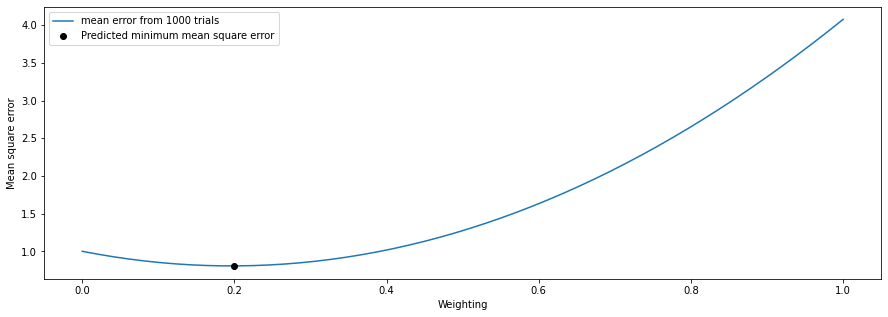

In [15]:
# We'll make the truth the zero state

T_true = 0.0


# Generate some vectors of examples

T_1 = T_true + np.random.normal(0, scale=2, size=1000)
T_2 = T_true + np.random.uniform(-np.sqrt(3),np.sqrt(3), size=1000)

def T_guess(a):
    """Function to generate zero bias """
    return a*T_1+(1-a)*T_2

x=np.linspace(0,1)
e_guess = [np.mean((T_guess(_)-T_true)**2) for _ in x]

p.figure(figsize=(15,5))
p.plot(x, e_guess, label='mean error from 1000 trials')

p.plot(1**2/(1**2+2**2),(1**2*2**2)/(1**2+2**2),'ko', label='Predicted minimum mean square error');
p.xlabel('Weighting')
p.ylabel('Mean square error')
p.legend();

### The Optimal Interpolation method

In the last case we only had observations, but often we have an existing full set of (possibly unrepresentative) data, $\mathbf{x}_b$, referred to as the *background* state, along with a limited set of observations, $\mathbf{y}$, which we wish to use to improve it. In NWP (or more generally when solving a mathematical model), $\mathbf{x}_b$ will be all the variables used to make a forecast (also known as the *prognostic* variables), written as a single one dimensional vector (or array). This vector will be of some fixed length, $m$. Meanwhile the relevant observations, $\mathbf{y}$, are all written as another one dimensional vector of length $n$.

Thus far, we have made no kind of assumption about what the information stored in $\mathbf{x}$ (nor in $\mathbf{y}$) represents. They could be grid point values in a finite difference model, volume values in a finite volume model or coefficent parameters in a finite element or spectral model. They could even be long term mean values derived from statistical records. All that matters is that they are continuous valued and that for field data, there has been some kind of discretization made so that there are a finite number of elements in the two vectors.

### The observation operator

Since the observations are related to the prognostic model variables, we will assume that there is some kind of mapping or observation operator, $H$ taking a given true state $\mathbf{x}$ and returning the observed value one would expect to see. For now we will also guess that the mapping is linear, so that it can be represented as a matrix.

As a concrete example, let the $\mathbf{x}_b$ be the surface temperatures at 4 corners of a grid square, and let the $\mathbf{y}$ be two temperature measurements within it. Then assuming a bilinear interpolation

$$ y_i = \sum_{j=1}^4 \alpha(r_i, s_i)_j[\mathbf{x}_b]_j $$

and 
$$ \mathbf{H} = \left(
\begin{array}{cccc}
\alpha(r_1, s_1)_1&\alpha(r_1, s_1)_2& \alpha(r_1, s_1)_3&\alpha(r_1, s_1)_3\\
\alpha(r_2, s_2)_1&\alpha(r_2, s_2)_2& \alpha(r_2, s_2)_3&\alpha(r_2, s_2)_3
\end{array} \right).$$


Note that $\mathbf{H}$ is a $m\times n$ matrix and so not generally square.

Given our backgorund, our observations and the observation matrix $\mathbf{H}$ we can define an *innovation* vector, $\mathbf{z}$ representing "new" knowledge,

$$\mathbf{z} = \mathbf{y} - \mathbf{H}\mathbf{x}_b.$$

This is another length $n$ vector telling us whether our observations were higher or lower than we would have expected them to be, given our previous forecast.

As when considering the clocks, we will make a new guess at the current state of the system, $\mathbf{x}_a$, now called an analysis, and we will assume that the new information brought in is represented by some linear combination of our innovation vector

$$\mathbf{x}_a = \mathbf{x}_b + \mathbf{W}\mathbf{z}. $$ 

At this point we will introduce a hypothetical *true* state, $\mathbf{x}_t$, as well as the (fixed) background and observation errors and the analysis error, which is a function of the weight matrix, $\mathbf{W}$,

$$\mathbf{e}_b = \mathbf{x}_b-\mathbf{x}_t, $$
$$\mathbf{e}_o = \mathbf{y}-\mathbf{H}\mathbf{x}_t, $$
$$\mathbf{e}_a = \mathbf{x}_a-\mathbf{x}_t = \mathbf{e_b}+\mathbf{W}(\mathbf{e}_o-\mathbf{H}\mathbf{e}_b). $$

In a similar manner to the clocks problem we will seek to minimise the sum of the component variances of the analysis error,

$$ f(\mathbf{W}):=E(\mathbf{e}_a^T \mathbf{e}_a) - \|E(\mathbf{e}_a)\|^2 
=  E([[\mathbf{e_b}+\mathbf{W}(\mathbf{e}_o-\mathbf{H}\mathbf{e}_b)])-\|E([\mathbf{e_b})+\mathbf{W}(E(\mathbf{e}_o)-\mathbf{H}E(\mathbf{e}_b))]\mathbf{e_b}+\mathbf{W}(\mathbf{e}_o-\mathbf{H}\mathbf{e}_b)]^T)\|^2.$$

Assuming that the background and observation errors have zero mean (so that in turn $E(\mathbf{e}_a)=0$) and taking derivatives with respect to the $\mathbf{W}$ we get a normal equation

$$ 2E((\mathbf{e}_o-\mathbf{H}\mathbf{e}_b)^T[\mathbf{e_b}+\mathbf{W}(\mathbf{e}_o-\mathbf{H}\mathbf{e}_b)])= 0.$$

taking the further assumption that the observation and background errors are uncorrelated (so that $E(\mathbf{H}\mathbf{e}_b\mathbf{e}_o^T)=0$ and introducing the notation

$$ \mathbf{B}:= E(\mathbf{e}_b\mathbf{e}_b^T),$$
$$ \mathbf{R}:= E(\mathbf{e}_o\mathbf{e}_o^T),$$
for the background and observation error covariances (size $m\times m$ and $n \times n$ respectively),
we can see (eventually) that the optimal weight matrix satisfies


$$\mathbf{W}_{\mbox{optimal}} := \mathbf{B} \mathbf{H}^T\left( \mathbf{R} + \mathbf{H}\mathbf{B}\mathbf{H}^T\right)^{-1}.$$

Note that the matrix to be inverted is of size $n \times n $, which will usually be significantly smaller that the $\mathbf{B}$ matrix. This is a good thing in terms of computational efficiency.

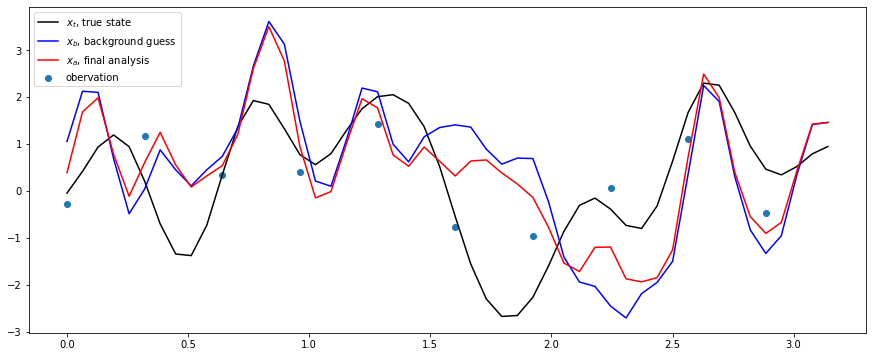

In [16]:
### Example optimal interpolation implementation & solution

### we will use 1d data and errors from a known distribution


### since the problem is small, we'll actually calculate full inverses
### generally this is a bad idea, and alternatives such as
### iterative methods should be considered
from scipy.linalg import inv


### define the standard deviation of the background and observations

sigma_t = 1.0
sigma_b = 1.0
sigma_r = 1.0

l_t = 0.2
l_e = 0.1
l_b = l_e

s = np.linspace(0, np.pi)

e_b = np.zeros(len(s))
x_t = np.zeros(len(s))


### Generate the truth and background states
### In this case, both of them have error terms attached

for _ in range(len(s)):
    e_b += np.random.normal(0, sigma_b)*np.exp(-(s-s[_])**2/l_e**2)
    x_t += np.random.normal(0, sigma_t)*np.exp(-(s-s[_])**2/l_t**2)

x_b = x_t + e_b


### Pick the locations of the observations by defining H
### (in the real world, the locations define H rather
### than the other way round)

H = np.zeros((len(s)//5, len(s)))
for _ in range(H.shape[0]):
    H[_,5*_] = 1
    
y = np.dot(H, x_t) 
y += np.random.normal(0, 1, size=(y.shape))

### Define the (diagonal in this case) observation error covariance matrix
R = sigma_r**2*np.eye(y.shape[0])


### Define the background error covariance matrix
### In this case, we know the true form of the error
### So can just write it down.

s2 = np.broadcast_to(s, (len(s), len(s)))
B = sigma_b**2*np.exp(-(s2-s2.T)**2/l_b**2)


### Calculate optimal gain matrix
W = B.dot((H.T)).dot(inv(R+H.dot(B.dot(H.T))))


### Apply the increments to generate the analysis state
x_a = x_b + W.dot(y-H.dot(x_b))


### Plot everything

p.figure(figsize=(15, 6))
p.plot(s, x_t, 'k', label='$x_t$, true state')
p.plot(s, x_b, 'b', label='$x_b$, background guess')
p.scatter(s[::5], y, label='obervation')
p.plot(s, x_a, 'r', label='$x_a$, final analysis')
p.legend();

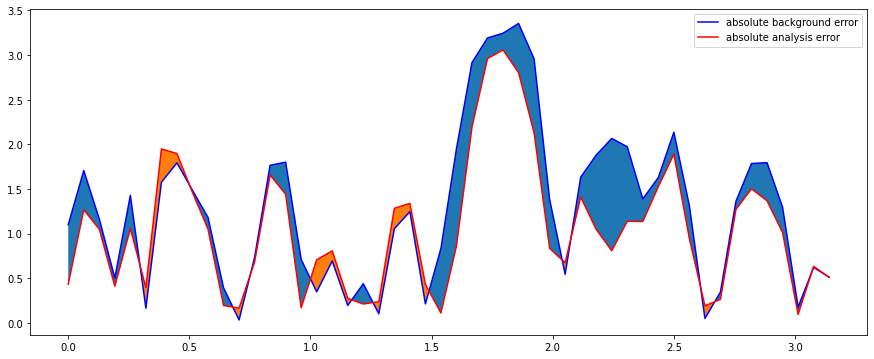

In [17]:
# Now plot an error comparison

p.figure(figsize=(15, 6))
p.plot(s, abs(x_b-x_t), 'b', label='absolute background error')
p.plot(s, abs(x_a-x_t), 'r', label='absolute analysis error')
p.fill_between(s, abs(x_b-x_t), abs(x_a-x_t), where=abs(x_b-x_t)>abs(x_a-x_t), interpolate=True)
p.fill_between(s, abs(x_b-x_t), abs(x_a-x_t), where=abs(x_b-x_t)<abs(x_a-x_t), interpolate=True)
p.legend();

We can also define the analysis error covariance matrix

$$ \mathbf{P}: = E(\mathbf{\epsilon}_a\mathbf{\epsilon}_a^T) = \mathbf{B}-\mathbf{B}\mathbf{H}^T\mathbf{W}-\mathbf{W}^T\mathbf{H}\mathbf{B}+\mathbf{W}(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T\mathbf{W}^T,$$

so that for the optimal (i.e. minimum mean square error) choice of gain matrix, the _analysis_ error covariance matrix is

$$\mathbf{P} = (\mathbf{I}-\mathbf{B}\mathbf{H}^T(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T)^{-1}\mathbf{H})\mathbf{B}.$$

## The variational approach,  3D-Var

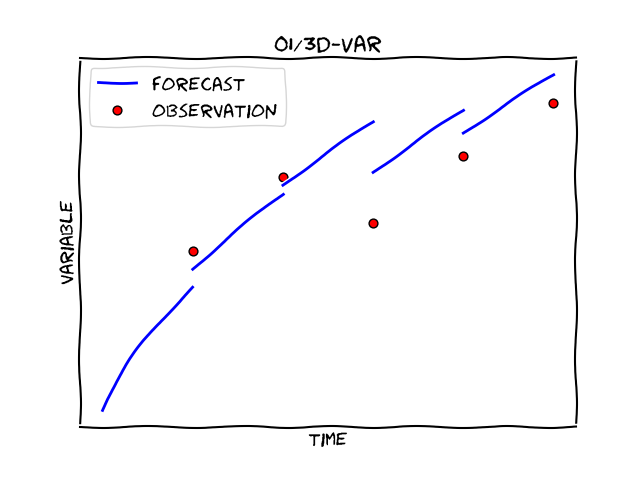

### Nonlinear observation operators

While interpolation operators are frequently linear, and thus well represented in matrix form, not all measurements are direct functions of the state variables of the model. A more general representation defines a (potentially) nonlinear *observation operator* as a function mapping the state variable values into the observation space. As a concrete example, simple anemometers measure wind speed, but not direction. Here the operator is

$$ h(u,v) = \sqrt{(u^2 + v^2)} $$

We can also define our new observation errror,
$$\mathbf{\epsilon}_o := \mathbf{y} - \mathbf{h}(\mathbf{x}_t)$$
and the linearization of $\mathbf{h}$,
$$H_{ij} := \frac{\partial h_i}{\partial x_j}$$

### Bayesian inference

Recall from our probability recap that

$$ \tag{Bayes' theorem} P(x\vert y) = \frac{P(y\vert x) P(x)}{P(y)}.$$

If probabilities are viewed as measures of belief then this allows us to update our $posterior$ estimate of the likelihood of an event based on new information observed and our $prior$ belief of its probability. If we assume that all errors are Gaussian multivariate variables with known error covariances, then we can calculate the *a posteriori* probability density of a state $\mathbf{x}$ given observations $\mathbf{y}$ (i.e. $p(\mathbf{x}\vert \mathbf{y})$) using the density form of Bayes theorem,

$$ p(\mathbf{x}\vert \mathbf{y}) = \frac{p(\mathbf{y}\vert \mathbf{x}) p(\mathbf{x})}{P(\mathbf{y})}.$$

Here the forms of the functions of $\mathbf{x}$ in the numerator,
$$ p(\mathbf{x})= \frac{1}{\sqrt{2^m}\vert\mathbf{B}\vert}\exp\left(-\frac{(\mathbf{x}_b-\mathbf{x})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x})}{2}\right),$$
$$ p(\mathbf{y}\vert\mathbf{x})= \frac{1}{\sqrt{2^n}\vert\mathbf{R}\vert}\exp\left(-\frac{(\mathbf{y}-h(\mathbf{x}))^T\mathbf{R}^{-1}(\mathbf{y}-h(\mathbf{x}))}{2}\right),$$

both follow from the assumptions that the background and observation errors are multivariate Gaussian diestribution. There is no such obvious definition of $P(\mathbf{y})$, although if viewed as a posterior estimate, it is obviously 1. However, since we are only seeking an optimal $\mathbf{x}$,not to calculate the posterior probability estimate, it is sufficient to maximize

$$ \exp\left(-\frac{(\mathbf{x}_b-\mathbf{x})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x})+(\mathbf{y}-h(\mathbf{x}))^T\mathbf{R}^{-1}(\mathbf{y}-h(\mathbf{x}))}{2}\right),$$

which is equivalent to minimizing

$$\mathcal{J}(\mathbf{x}) = (\mathbf{x}_b-\mathbf{x})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x})+(\mathbf{y}-h(\mathbf{x}))^T\mathbf{R}^{-1}(\mathbf{y}-h(\mathbf{x})) $$

as a function of $\mathbf{x}$.

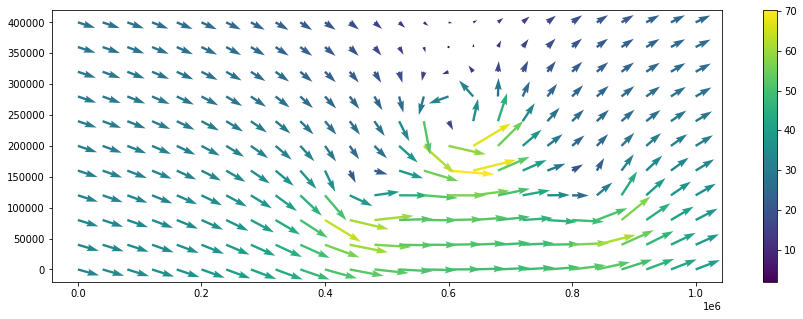

In [25]:
# Example 3D-Var implementation and solution

# We will use some weather-like 2d data and generate the B from climatology.

nx = 26
ny = 11

Lx = 1e6
Ly = 4e5

U_0 =  30.0
radius = 5e4

def wind_field(X, Y, circulations, centres):
    """ We make a wind field in this case as the sum of a background
    wind running from west of east, plus a load of 'low pressure' vortices
    acting like storms.
    """
    
    U = np.full((ny, nx), U_0)
    V = np.zeros((ny, nx))
    
    for circ, (x, y) in zip(circulations, centres):
        
        r2= (X-x)**2 + (Y-y)**2
        
        u = circ/(2*np.pi)*np.where(r2>radius**2, 1./r2, 1.0/radius**2) 
        
        
        U -= (Y-y)*u
        V += (X-x)*u
        
    return U, V

X, Y = np.meshgrid(np.linspace(0,Lx,nx), np.linspace(0,Ly, ny))


def random_vortices(N, kx=5, ky=5):
    return (200*np.random.lognormal(0, 0.1, size=N)*radius,
            np.random.uniform([-kx*radius, -kx*radius], [Lx+ky*radius, Ly+ky*radius], (N, 2)))

def plot_wind(X, Y, u, v):
    p.figure(figsize=(15,5))
    p.quiver(X, Y, u, v, np.sqrt(u**2+v**2))
    p.colorbar()
    p.axis('equal')
    
    
U_t, V_t = wind_field(X, Y, *random_vortices(4, -1, -1))
plot_wind(X, Y, U_t, V_t);

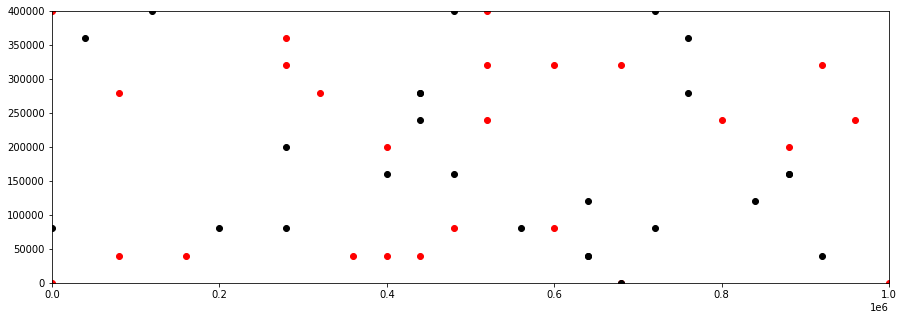

In [36]:
# observation locations
n_full = 25
n_speed = 25
y_loc = np.random.randint(0, nx*ny, n_full+n_speed)
# get the observation values from the truth
y = np.empty(2*n_full+n_speed)
y[:n_full] = U_t.ravel()[y_loc[:n_full]] + np.random.normal(0, 2.0, n_full)
y[n_full:2*n_full] = V_t.ravel()[y_loc[:n_full]] + np.random.normal(0, 2.0, n_full)
y[2*n_full:] = (np.sqrt(U_t.ravel()[y_loc[n_full:]]**2
                      + V_t.ravel()[y_loc[n_full:]]**2)
                      + np.random.normal(0, 2, n_speed))

def h(x):
    hx = np.empty(2*n_full+n_speed)
    u = x[y_loc]
    v = x[ny*nx+y_loc]
    hx[:n_full] = u[:n_full] = u[:n_full]
    hx[n_full:2*n_full] = v[:n_full]
    hx[2*n_full:] = np.sqrt(u[n_full:]**2+v[n_full:]**2)
    
    return hx

R = 2.0**2*np.eye(2*n_full+n_speed)

p.figure(figsize=(15,5))
p.scatter(X.ravel()[y_loc[:n_full]], Y.ravel()[y_loc[:n_full]], c='r')
p.scatter(X.ravel()[y_loc[n_full:]], Y.ravel()[y_loc[n_full:]], c='k')
p.axis([0, Lx, 0, Ly]);

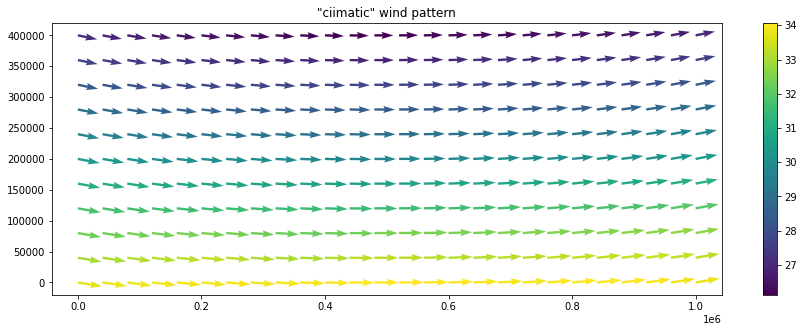

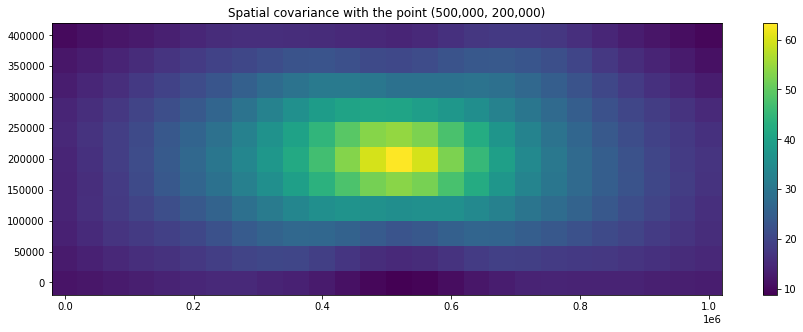

In [38]:
U = np.empty((5000,ny,nx))
V = np.empty((5000,ny,nx))

for _ in range(U.shape[0]):
    U[_, : :], V[_, :, :] = wind_field(X, Y, *random_vortices(4))

mu_u = np.mean(U, 0)
mu_v = np.mean(V, 0)

plot_wind(X, Y, mu_u, mu_v)
p.title('"ciimatic" wind pattern')

d = np.empty((U.shape[0], 2*ny*nx))

for _ in range(d.shape[0]):
    d[_, :ny*nx] = (U[_, :]-mu_u).ravel() 
    d[_, ny*nx:] = (V[_, :]-mu_v).ravel()
    
B = np.empty((2*nx*ny, 2*nx*ny))

### This time we'll generate the background error covariance matrices from 
### sample statistics based on lots of observations

for i in range(2*nx*ny):
    for j in range(2*nx*ny):
        # We'll be good and use the unbiased (N-1) form of the covariance
        B[i, j] = np.sum(d[:, i]*d[:, j])/(U.shape[0]-1)
    

p.figure(figsize=(15,5))
p.title('Spatial covariance with the point (500,000, 200,000)')
p.pcolormesh(X, Y, B[ny//2*nx+nx//2, :ny*nx].reshape((ny,nx)), shading='auto')
p.colorbar();

Text(0.5, 1.0, 'Analysis wind field')

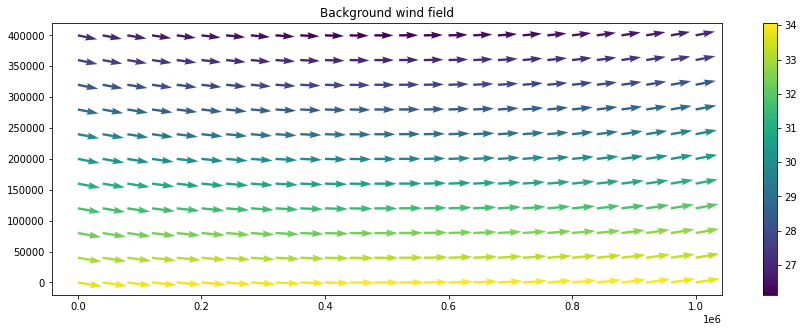

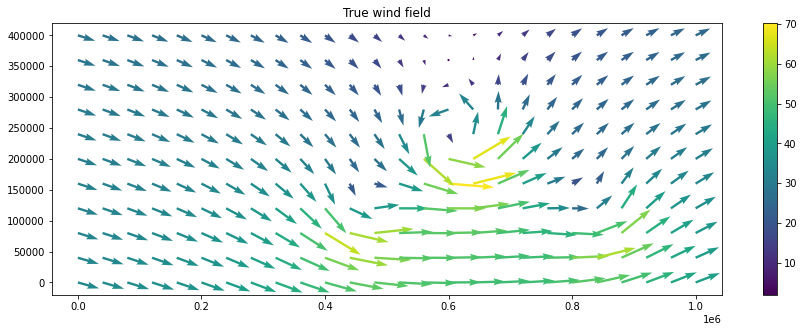

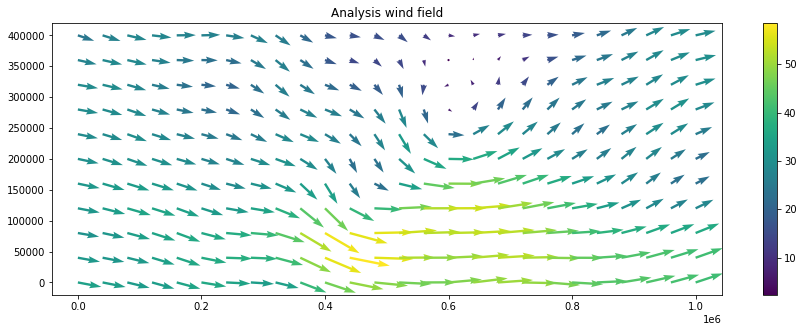

In [39]:
x_b = np.empty(2*ny*nx)

x_b[:ny*nx] = mu_u.ravel()
x_b[ny*nx:] = mu_v.ravel()

### We'll use the true dense inverse. In practice this is usually to expensive 
### (and/or inaccurate) to use.

Binv = inv(B)
Rinv = inv(R)

def J(x):
    """3DVar cost function"""
    dx_b = x-x_b
    dx_o = y - h(x)
    return np.dot(dx_b, Binv.dot(dx_b))+np.dot(dx_o,Rinv.dot(dx_o))

def callback(x):
    ### Change False to True to print out the convergence of the cost function
    if False:
        print(J(x))

from scipy.optimize import minimize


### Minimise the cost function to get the analysis state

res = minimize(J, x_b, method='CG', callback = callback, tol = 1e-3, options={'maxiter':100})
x_a = res.x

U_a = x_a[:ny*nx].reshape((ny,nx))
V_a = x_a[ny*nx:].reshape((ny,nx))


### Plot out the results

plot_wind(X, Y, mu_u, mu_v)
p.title('Background wind field')
plot_wind(X, Y, U_t, V_t)
p.title('True wind field')
plot_wind(X, Y, U_a, V_a)
p.title('Analysis wind field')


If $\mathbf{h}$ happens to be linear (i.e $\mathbf{h}(\mathbf{x})=\mathbf{H}\mathbf{x}$), the optimal solution, which by defnition has $\nabla_\mathbf{x}\mathcal{J}=0$, satisfies

$$ \mathbf{B}^{-1}(\mathbf{\mathbf{x}_a-\mathbf{x}_b}) - \mathbf{H}^T\mathbf{R}^{-1}(\mathbf{y}-\mathbf{H}\mathbf{x}_a)=0$$

or 

$$ \mathbf{x}_a-\mathbf{x}_b = \left(\mathbf{B}^{-1}+\mathbf{H}^T\mathbf{R}^{-1}\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{R}^{-1}[\mathbf{y}-\mathbf{H}\mathbf{x}_b] $$.

Unlikely as is may seem, this is actually the same solution as for the optimal interpolation method given above (this is a lot more trivial to prove when $\mathbf{H}$ is the identity operator).


If we further introduce the notation $\|\mathbf{a}\|^2_{\mathbf{M}}=\mathbf{a}^T\mathbf{M}^{-1}\mathbf{a}$, then we can (with a bit of work) rewrite the linear 3D-Var cost function in terms of the state error, $\mathbf{e}:= \mathbf{x}-\mathbf{x}_t$, background error, $\mathbf{e}_b:= \mathbf{x}_b-\mathbf{x}_t$ and observation error, $\mathbf{e}_o:= \mathbf{y}-\mathbf{H}\mathbf{x}_t$
$$\mathcal{J}(\mathbf{e})=\|\mathbf{e}-\mathbf{e}_b\|^2_{\mathbf{B}}+\|\mathbf{H}\mathbf{e}-\mathbf{e}_o\|^2_{\mathbf{R}}. $$
In this viewpoint, the system has reduced to a slightly unusual regularized linear inversion problem for the observation error, being carried out in our special likelihood norm as defined by our knowledge of the covariance matrices.

## The Kalman Filter

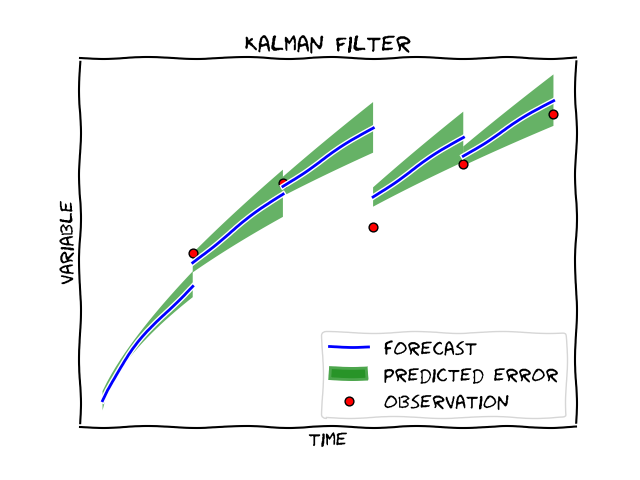

### Timestepping & information propagation

So far, we have ignored the concept of time, and have assumed that all observations are valid simultaneously. In the real world, at least on the time scales on which the weather is observed and forecast, this is not usually true. One option would be to apply a "stop-start" algorithm, run our forecast model forward and then apply our existing methods from the previous section. However we can do better by remembering that some statistical information propagates forward through the model almost as easily as the state does.

Consider a system with a known "perfect", deterministic linear (forward) model $\mathbf{M}$ such that

$$\mathbf{x}^{k+1}_t = \mathbf{M}\mathbf{x}^k_t + \mathbf{f},$$

for a known set of forcings/boundary conditions $\mathbf{f}$.

For a new timestep, we can generate a forecast by advancing our last analysis using the model, 
$$\mathbf{x}^{k+1}_b = \mathbf{M}\mathbf{x}^k_a +\mathbf{f}_b,$$

where $\mathbf{f}_b=\mathbf{f}+\mathbf{e}_f$ are the forcings used for our forecast, containing Gaussian errors $e_f=\mathcal{N}(0, \mathbf{Q})$. Subtracting one equation from the other, the new background error vector satisfies

$$\mathbf{e}_b^{k+1} = \mathbf{M}\mathbf{e}^k_a +\mathbf{e}_f$$

and providing the forcast forcing errors are independent of the errors in the forecast itself, our new (i.e. time $k+1$) "background" error covariance matrix satisfies

$$\mathbf{B}^{k+1} = \mathbf{M}\mathbf{P}^k\mathbf{M}^T+\mathbf{Q}$$

where $\mathbf{P}^k$ is the analysis error covariance at time $k$. Since this is calculable, this is the matrix we should really be using in our next optimal interpolation update step, since it contains useful information about how trustworthy the various elements of the current forecast are.

Doing this for each timestep, the update now becomes a 4 stage process

 1. Use the model to update the old analysis into the new forecast
$$ \mathbf{x}^{k+1}_b = \mathbf{M}\mathbf{x}^k_a+\mathbf{f}_b$$
 2. Use the model to update the old analysis error covariance into the new forecast error covariance
$$\mathbf{B}^{k+1} = \mathbf{M}\mathbf{P}^k\mathbf{M}^T +\mathbf{Q}$$
 3. Use the observation innovations to optimally update the forecast state into a new analysis,
$$ \mathbf{x}^{k+1}_a = \mathbf{x}^{k+1}_b + \mathbf{B}^{k+1} \mathbf{H}^T\left( \mathbf{R}^{k+1} + \mathbf{H}\mathbf{B}\mathbf{H}^T\right)^{-1} (\mathbf{y}^{k+1}-\mathbf{H}\mathbf{x}^{k+1}_b).$$
 4. Calculate the analysis error covariance.
 $$\mathbf{P} = (\mathbf{I}-\mathbf{B}\mathbf{H}^T(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T)^{-1}\mathbf{H})\mathbf{B}.$$

/home/jrper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


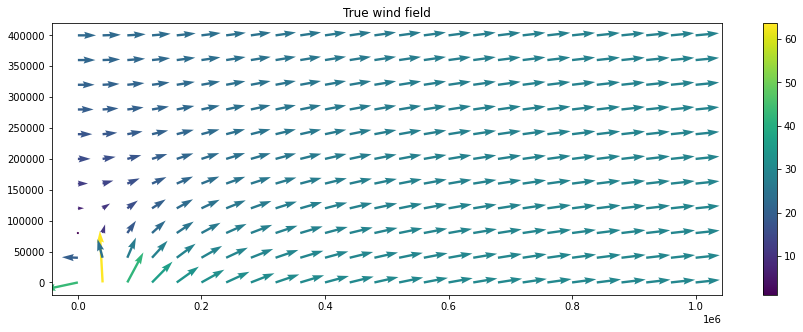

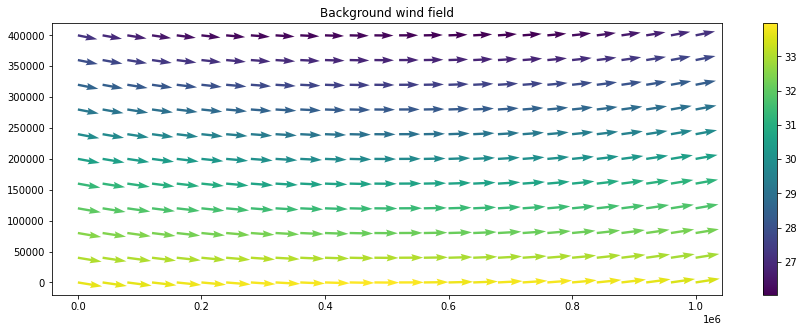

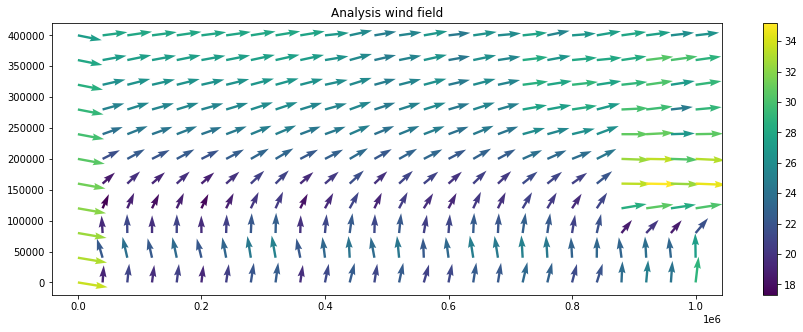

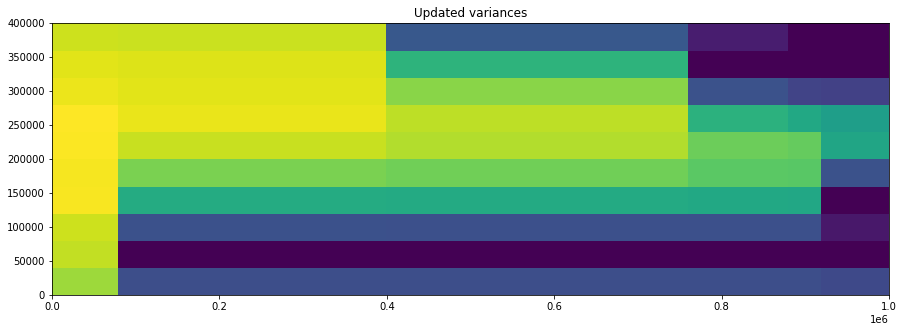

In [22]:
# Kalman filter implementation for linearized vortices

### We'll use the same sort of data as for 3D-Var, except the vortices will
### move with the background flow.

nx = 26
ny = 11

Lx = 10000
Ly = 4000

U_0 =  30.0
radius = 500

dt = Lx/(nx-1)/U_0
vortices = random_vortices(200, 100)
def advance_vortices(v):
    ### We've picked the timestep to just move the data by one gridbox
    v[1][:, 0] +=Lx/(nx-1)

B_k = np.empty((2*ny*nx, 2*ny*nx))
I = np.eye(2*ny*nx)
M = np.zeros((2*ny*nx, 2*ny*nx))
P = np.zeros((2*ny*nx, 2*ny*nx))
Q = np.zeros((2*ny*nx, 2*ny*nx))
Q[::nx,::nx] = B[::nx,::nx] # take forcing error from the statistics for B at x=0


### Forward model is simple, since data is moving a grid point per timestep.

for j in range(ny):
    for i in range(1, nx):
        M[j*nx+i, j*nx+i-1] = 1
        M[ny*nx+j*nx+i, nx*ny+j*nx+i-1] = 1
        
f_b = np.zeros(2*nx*ny)
f_b[::nx] = x_b[::nx]  # boundary condition sets x_a = mean at x=0

n_full = 5
sigma_r = 1.0
y_loc = np.random.randint(0, nx*ny, n_full)
R_k = sigma_r**2*np.eye(2*n_full)
H_k = np.zeros((2*n_full, 2*nx*ny))
for i, j in enumerate(y_loc):
    H_k[i, j] = 1.0
    H_k[n_full+i,nx*ny+j] = 1.0
    
### Start from the B matrix from 3D-Var
    
B_k[:,:] = B


nt = 40

x_a = x_b # initialise assimilation with mean values
P[:,:] = B

### Now do all the Kalman filter steps

for _ in range(nt):
    advance_vortices(vortices)
    U_t, V_t = wind_field(X, Y, *vortices)
    x_t = np.concatenate((U_t.ravel(), V_t.ravel())) 
    
    y = H_k.dot(x_t) + np.random.normal(0, sigma_r, size=2*n_full)
    
    # pull forward x
    x_b_k = M.dot(x_a)+f_b
    
    
    # pull forward P
    B_k[:,:] = M.dot(P.dot(M.T)) + Q
    # use innovations
    W = B_k.dot((H_k.T)).dot(inv(R_k+H_k.dot(B_k.dot(H_k.T))))
    x_a = x_b_k + W.dot(y-H_k.dot(x_b_k))
    # calculate new P from B
    P[:,:] = (I-W.dot(H_k)).dot(B_k)
    
U_t, V_t = x_t[:nx*ny].reshape((ny, nx)), x_t[nx*ny:].reshape((ny, nx))
plot_wind(X, Y, U_t, V_t)
p.title('True wind field')

U_b, V_b = x_b[:nx*ny].reshape((ny, nx)), x_b[nx*ny:].reshape((ny, nx))
plot_wind(X, Y, U_b, V_b)
p.title('Background wind field')

U_a, V_a = x_a[:nx*ny].reshape((ny, nx)), x_a[nx*ny:].reshape((ny, nx))
plot_wind(X, Y, U_a, V_a)
p.title('Analysis wind field')

p.figure(figsize=(15,5))
p.title('Updated variances')
p.pcolormesh(X, Y, B_k.diagonal()[:nx*ny].reshape((ny, nx)))
    


The method can be extended to nonlinear models and observation operators through linearization to give the *extended Kalman Filter method*.

## 4D-Var

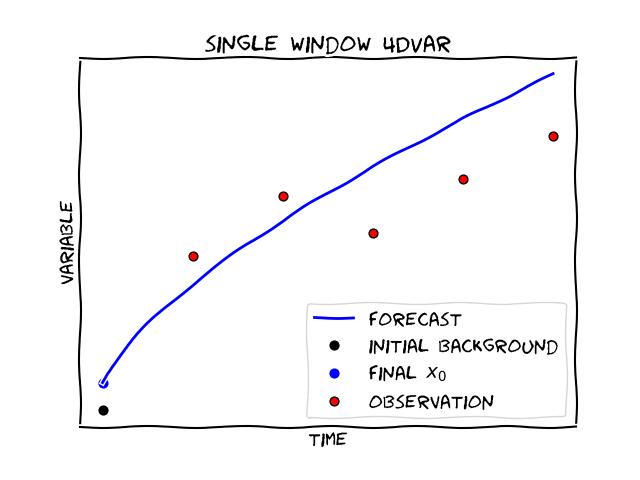

### Temporal aware variational assimilation

4D-Var is the time-aware equivalent of the 3D-Var method (i.e. the 4th dimension is time). Again assuming that our observation and background errors follow a Gaussian distribution, we now seek an initial state vector, $\mathbf{x}_0$, which maximizes the joint probability density with the observations arising from Bayes Theorem, this time for all observations in a "time window" between $t_0$ and $t_f$.

$$ p(\mathbf{x}_0\vert \mathbf{y}) \propto \exp\left(-\frac{(\mathbf{x}_b-\mathbf{x_0})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\sum_i(\mathbf{y}-h_i(\mathbf{x}(t_i))))^T\mathbf{R}_i^{-1}(\mathbf{y}-h_i(\mathbf{x}(t_i)))}{2}\right),$$
with respect to $\mathbf{x}$, subject to the constraint that the forward PDE model applied, or equivalently in a time and space discretized form, minimizing the cost function

$$ \mathcal{J}(\mathbf{x_0}) = \frac{1}{2}\left[(\mathbf{x}_b-\mathbf{x_0})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\sum_i(\mathbf{y}-h_i(\mathbf{x}(t_i))))^T\mathbf{R}_i^{-1}(\mathbf{y}-h_i(\mathbf{x}(t_i)))\right], $$

subject to the constraints that 
$$\mathbf{x}^{(0)} = \mathbf{x}_0, $$
$$ \mathbf{x}^{(k+1)} = \mathbf{m}^{(k)}\left(\mathbf{x}^{(k)}\right),$$
$$x(t) = f(t, \mathbf{x}^{(0)}, \mathbf {x}^{(1)}, \ldots, ),$$
for some temporal interpolation function, $f$.

Applying a set of Lagrange multipliers, $\lambda_i$ to deal with the constraints, we get an extended problem,
$$ \mathcal{J}_{ext}(\mathbf{x_0}) = \frac{1}{2}\left[(\mathbf{x}_b-\mathbf{x_0})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\sum_i(\mathbf{y}-h_i(\mathbf{x}(t_i))))^T\mathbf{R}_i^{-1}(\mathbf{y}-h_i(\mathbf{x}(t_i)))\right], +\sum_{i=0}^{N-1}\lambda_i\left(\mathbf{x}^{(i+1)}-\mathbf{m}(\mathbf{x}^{(i)})\right)$$

eventually get the following equation set,

$$ \nabla_{\mathbf{x}_0} \mathcal{J} = \mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\mathbf{M}^T\lambda_0$$
$$ \mathbf{x}^{(k+1)} = \mathbf{m}^{(k)}\left(\mathbf{x}^{(k)}\right) $$
$$ \mathbf{\lambda}_{i-1} = {\mathbf{M}^T}^{(i)}\mathbf{\lambda}_{i} +\sum_j \frac{\partial f_j}{\partial \mathbf{x}^{(i)}}H_j^T\mathbf{R}^{-1}(\mathbf{y}-\mathbf{h}(\mathbf{x}(t_j)))$$
$$ \lambda_N = \sum_j \frac{\partial f_j}{\partial \mathbf{x}_N}H_j^T\mathbf{R}^{-1}(\mathbf{y}-\mathbf{h}(\mathbf{x}(t_j)))$$

where $\mathbf{M} = \frac{\partial \mathbf{m}}{\partial \mathbf{x}}$ is the tangent linear model and $\mathbf{M}^T$ is the adjoint. 



As with the 3D-Var method when compared with OI, 4D-Var turns the Kalman Filter into a logically consistant problem which includes the nonlinearities present in the real world, and which can be attacked by existing optimization techniques. However, the requirement that errors should be Gaussian is rarely satisfied exactly and only sometimes satisfied approximately.

For completeness, lets add some code.

2.8161919226103986
2.7694987634269213
2.769482151489931
2.769482145517152
2.7694821455149965
2.7694821455149947
2.769482145514991
2.769482145514991
Cost function for $x_b$ 163.44890986982415
Cost function for $x_a$ 2.769482145514991


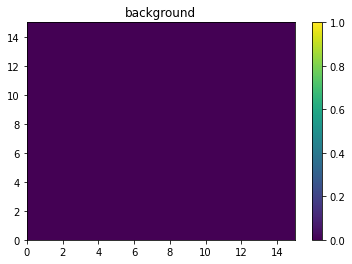

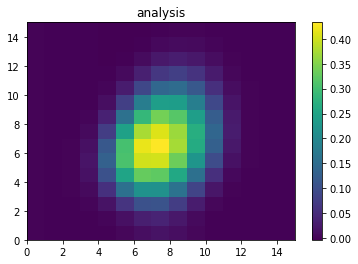

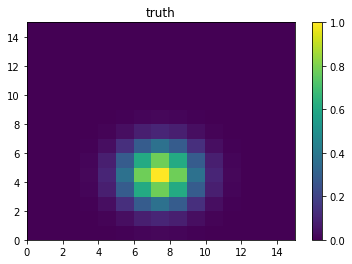

In [23]:
# 4D var implementation for a diffusion problem with swarth observational data

nx = 15
nt = nx**2
dt = 0.1
dx = 1
u = 0.2
k = 0.1


### Make a discrete model

def forward_model(x0):
    x = np.empty((nt, nx, nx))
    x[0, :, :] = x0
    
    for t in range(1, nt):
        x[t, ...] = x[t-1, ...]
        x[t, 1:, :] += u*dt/dx*(x[t-1, :-1, :]-x[t-1, 1:, :])
        x[t, :-1, :] += k*dt/dx**2*(x[t-1, 1:, :]**2-x[t-1, :-1,:]**2)
        x[t, :, :-1] += k*dt/dx**2*(x[t-1, :, 1:]**2-x[t-1, :, :-1]**2)
        x[t, :, 1:] += k*dt/dx**2*(x[t-1, :, :-1]**2-x[t-1, :, 1:]**2)
        x[t, 1:, :] += k*dt/dx**2*(x[t-1, :-1, :]**2-x[t-1, 1:, :]**2)
        
    return x

### Calculate the adjoint model under the tangent linear assumption

def adjoint_model(x, y, h, Rinv):
    deltay = (y[-1, :]-h[-1, ...].dot(x[-1,...].ravel())).ravel()
    l = -(h[-1, ...].T.dot(Rinv.dot(deltay)).reshape((nx, nx)))
    for t in range(nt):
        tmp = l.copy()
        tmp[:-1, :] -= u* dt/dx*(l[:-1, :]-l[1:, :])
        z = x[-t-1, ...]
        tmp[:-1, :] -= 2.0*k*dt/dx**2*(z[:-1, :]*l[1:, :]-z[1:,:]*l[:-1, :])
        tmp[:, :-1] -= 2.0*k*dt/dx**2*(z[:, :-1]*l[:, 1:]-z[:,1:]*l[:, :-1])
        tmp[:, 1:] -= 2.0*k*dt/dx**2*(z[:, 1:]*l[:, :-1]-z[:, :-1]*l[:, 1:])
        tmp[1:, :] -= 2.0*k*dt/dx**2*(z[1:, :]*l[:-1, :]-z[:-1, :]*l[1:, :])
        l = tmp
        if t>0:
            deltay = (y[-t-1, :]-h[-t-1, ...].dot(x[-t-1,...].ravel())).ravel()
            l = l - h[-t-1, ...].T.dot(Rinv.dot(deltay)).reshape((nx, nx))
        
    return l
                
    
X, Y = np.meshgrid(np.linspace(0,nx-1,nx), np.linspace(0, nx-1, nx))
x0 =np.exp(-((X-7)**2+(Y-4)**2)/4.0)
x_t = forward_model(x0)


X = X.ravel()
Y = Y.ravel()

Binv = np.empty((nx*nx, nx*nx))

### Make a choice for our B matrix (or rather its inverse)
### No stats here, just picking a cut off length

for i in range(nx*nx):
    for j in range(nx*nx):
        d2 = (X[i]-X[j])**2
        dx += (Y[i]-Y[j])**2
        Binv[i, j] = 0.05*np.exp(-0.1*d2)
        

h = np.zeros((nt, 1, nx**2))
y = np.zeros((nt, 1))
x_o = np.zeros((nx, nx))
Rinv = np.eye(1)/0.1**2

### Set up our observations. Note that H is different on different timesteps

for _ in range(nt):
    h [_, 0, (_%nx)*nx+_//nx] = 1
    y[_, :] = h[_, :, :].dot(x_t[_, ...].ravel())
    x_o += (h[_, :, :].T.dot(h[_, :, :].dot(x_t[_, ...].ravel()))).reshape((nx, nx))

x_b = np.zeros((nx*nx))


### Define the 4DVar cost function

def j(x0, y, h):
    x = forward_model(x0.reshape(nx, nx))
    j_b0 = 0.5*(x0-x_b).dot(Binv.dot((x0-x_b)))
    j_b = j_b0
    for _ in range(nt):
        deltay = (y[_, :]-h[_, ...].dot(x[_,:, :].ravel()))
        j_b += 0.5*np.sum(deltay.dot(Rinv.dot(deltay)))
    return j_b

### And the function giving the gradient with respect to x_0

def jac(x0, y, h):
    x = forward_model(x0.reshape(nx, nx))
    jac= Binv.dot(x0-x_b) + adjoint_model(x, y, h, Rinv).ravel()
    return jac

from scipy.optimize.linesearch import line_search_armijo as line_search

### iterate with a basic linesearch to minimise the cost function and generate the 
### analysis state.

x_a = x_b.copy()
j0 = j(x_a, y, h)
for _ in range(100):
    pk = -jac(x_a, y, h)
    res = line_search(j, x_a, pk, -pk, j0, args=(y, h), alpha0=0.5)
    x_a += res[0]*pk
    j0 = res[2]
    print(j0)
    if res[0]<1e-3:
        break

j0 = jac(x_b, y, h)

### Now plot some figures

print('Cost function for $x_b$', j(x_b, y, h))
print('Cost function for $x_a$', j(x_a, y, h))


x_f = forward_model(x_a.copy().reshape((nx, nx)))

p.figure()
p.title('background')
p.pcolormesh(x_b.reshape((nx, nx)), vmin=0, vmax=1)
p.colorbar()

p.figure()
p.title('analysis')
p.pcolormesh(x_a.reshape((nx, nx)))
p.colorbar()

p.figure()
p.title('truth')
p.pcolormesh(x_t[0, ...])
p.colorbar();


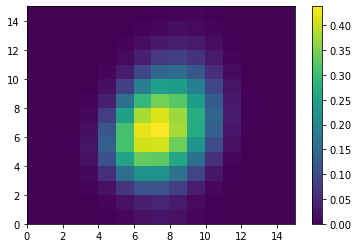

In [24]:
p.figure()
p.pcolormesh(x_o)
p.colorbar()



<div class="alert, alert-info">
    
### Weak Constraint 4D-Var (*)
    
In the implementation above we have enforced the constraint that all state variables satisfy the model equations exactly. In practice, as has been stated elsewhere, **all models are wrong**, though some are more wrong than others! If we have data on the model errors, and can assume that they are also Gaussian with a known error covariance matrix, $\mathbf{Q}$ (definitely not always the case in practice) then we can instead include the model error as another penalty term in the extended cost function,

$$\mathcal{J}_{ext}= \frac{(\mathbf{x}_b-\mathbf{x_0})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\sum_i(\mathbf{y}_i-\mathbf{h}_i(\mathbf{x}_i)))^T\mathbf{R}_i^{-1}(\mathbf{y}_i-\mathbf{h}_i(\mathbf{x}_i)) + \sum_{i=0}^N \left(\mathbf{x}_{i+1}-\mathbf{x}_i-\mathbf{m}(\mathbf{x}_i, t_i)\right)^T\mathbf{Q}^{-1}\left(\mathbf{x}_{i+1}-\mathbf{x}_i-\mathbf{m}(\mathbf{x}_i, t_i)\right)}{2}.$$
In this formulation the $\mathbf{x}_i$ optimality condition becomes our new update equation,
    
$$\mathbf{Q}^{-1}\left(\mathbf{x}_{N}-\mathbf{x}_{N-1}-\mathbf{m}(\mathbf{x}_{N-1}, t_{N-1})\right)+\mathbf{H}_i^T\mathbf{R}_i^{-N}(\mathbf{h}_N(\mathbf{x}_N)-\mathbf{y}_N)=\mathbf{0},$$
    
$$\mathbf{Q}^{-1}\left(\mathbf{x}_{i}-\mathbf{x}_{i-1}-\mathbf{m}(\mathbf{x}_{i-1}, t_{i-1})\right)-\left(\mathbf{I}+\mathbf{M}_{i}\right)^T\mathbf{Q}^{-1}\left(\mathbf{x}_{i+1}-\mathbf{x}_i-\mathbf{m}(\mathbf{x}_i, t_i)\right)+\mathbf{H}_i^T\mathbf{R}_i^{-1}(\mathbf{h}_i(\mathbf{x}_i)-\mathbf{y}_i)=\mathbf{0}.$$
    
Writing $\mathbf{x}_{i+1}-\mathbf{x}_i-\mathbf{m}(\mathbf{x}_i, t_i)=\mathbf{e^f}_i$ we can simplify the notation to
    
$$\mathbf{Q}^{-1}\mathbf{e^f}_{N-1}=\mathbf{H}_i^T\mathbf{R}_i^{-N}(\mathbf{y}_N-\mathbf{h}_N(\mathbf{x}_N))\mathbf{0},$$
    
$$\mathbf{Q}^{-1}\mathbf{e^f}_{i-1}=\left(\mathbf{I}+\mathbf{M}_{i}\right)^T\mathbf{Q}^{-1}\mathbf{e^f}_{i}+\mathbf{H}_i^T\mathbf{R}_i^{-1}(\mathbf{y}_i-\mathbf{h}_i(\mathbf{x}_i)).$$    
    
In a sense, this comes full circle to nudging, with an additional forcing term added to the model equations to move the system towards the maximum likelihood solution in a statistically consistent manner. This adds an additional computational cost calculating these additional degrees of freedom, but note that this is approximately the cost of the adjoint solve in strong constraint 4D-Var.
    
</div>
    
### The Extended Kalman Filter
    
By linearizing the foward model (as in the 4D-Var method) around our existing forecast we can also extend the Kalman filter algorithm into an appproximate method for nonlinear models and observations:
    
 1. Use the nonlinear model to update the old analysis into the new forecast
$$ \mathbf{x}^{k+1}_b = \mathbf{m}(\mathbf{x}^k_a, t_k)+\mathbf{f}_b$$
 2. Use the linearized model to update the old analysis error covariance into the new forecast error covariance
$$\mathbf{B}^{k+1} = \mathbf{M}_k\mathbf{P}^k\mathbf{M}^T_k +\mathbf{Q}$$
 3. Use the nonlinear observation innovations and linearized observation operator to (near)optimally update the forecast state into a new analysis,
$$ \mathbf{x}^{k+1}_a = \mathbf{x}^{k+1}_b + \mathbf{B}^{k+1} \mathbf{H}^T\left( \mathbf{R}^{k+1} + \mathbf{H}\mathbf{B}\mathbf{H}^T\right)^{-1} (\mathbf{y}^{k+1}-\mathbf{h}_k(\mathbf{x}^{k+1}_b)).$$
 4. Calculate the analysis error covariance.
 $$\mathbf{P} = (\mathbf{I}-\mathbf{B}\mathbf{H}^T(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T)^{-1}\mathbf{H})\mathbf{B}.$$
    
This is a standard technique in signals processing, but as with the standard Kalman filter, the covariance updates quickly grow intractable as the length of the model state vector increases.


<div class="alert, alert-info">
    
## The Ensemble Kalman Filter (*)

When there is more state data than observation data, the biggest single expense in calculating the Kalman filter is the set of big matrix-matrix multiplications required to calculate the term $\mathbf{M}\mathbf{P}\mathbf{M}^T$. If P and M are both sparse, then this cost can be reduced, but an alternative, simple to implement approach is to replace the single analysis state vector, $\mathbf{x}_a$ with an ensemble,
$$\mathbf{X}_a = \{\mathbf{x}_a^{(1)}, \mathbf{x}_a^{(2)}, \ldots, \mathbf{x}_a^{(N)}\}, $$
with the members drawn to be representative of the multivariate distribution parameterized with mean $\frac{1}{N}\sum x_{b}^{(i)}=\mathbf{x}_b$ and covariance, $\mathbf{P}$. We can then advance the individual ensemble states with a traditional model,
$$\mathbf{X}_b^{k+1} = \{\mathbf{m}(\mathbf{x}_a^(1)), \mathbf{m}(\mathbf{x}_a^{(2)}), \ldots, \mathbf{x}_a^{(N)}\} $$
calculate sample estimates for the mean state,
$$\overline{\mathbf{x}}_b^{k+1} = \frac{1}{N}\sum_{i=1}^{N}\mathbf{x}_a^(i),$$
and the forecast covariance,
$$\mathbf{C}^{k+1}\approx \mathbf{P} := \frac{1}{N-1} \sum_{i=1}^N (\mathbf{x}_b^{(i)}-\overline{\mathbf{x}}_b)(\mathbf{x}^{(i)}-\overline{\mathbf{x}}_b)^T $$
then apply the Optimal Interpolation increment to assimilate the observation data.

One issue with this approach if the real observations are assimilated. then the individual ensemble members will rapidly cease to be genuinely independent. One option is to regenerate the ensemble each timestep, however, this step will tend to be expensive, so a common alternative is to add noise to the observations, drawn  from the known observation multivariate Gaussian distribution, $\mathcal{N}(0, \mathbf{R}).$
</div>

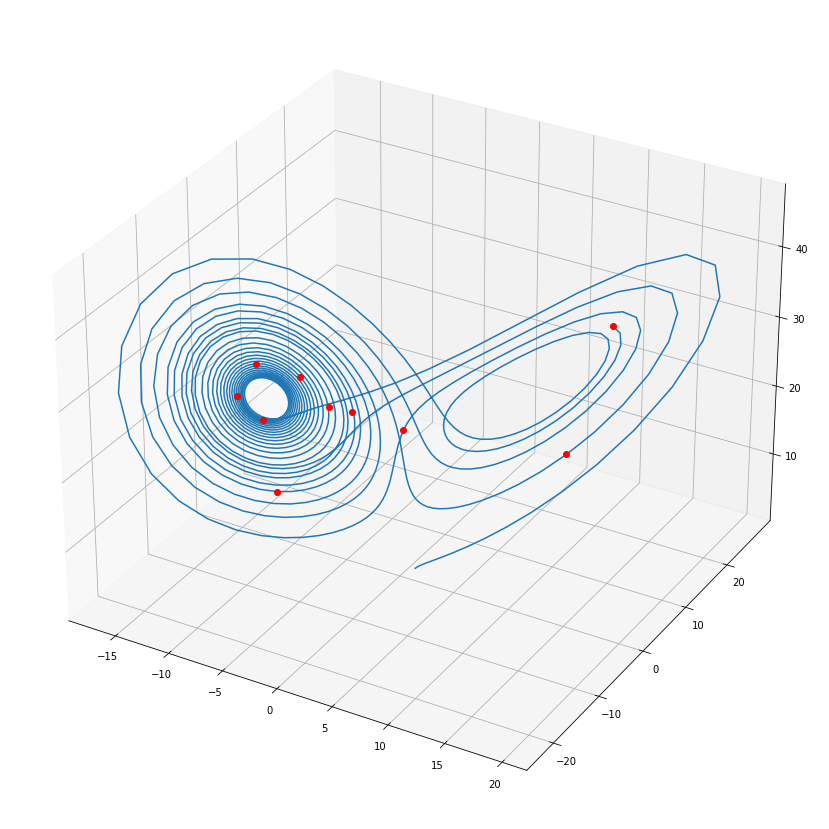

In [25]:
# trivial Ensemble Kalman filter for Lorenz attractor


# start by building a model
from scipy.integrate import odeint

rho = 28
sigma = 10
beta = 8/3

def f(X, t):
    """ Put the Forward Euler right hand side for Lorenz attractor"""
    
    x = X.reshape(3, len(X)//3)
    
    y = np.empty(x.shape)
    
    y[0, :] = sigma*(x[1, :]-x[0, :])
    y[1, :] = -x[0, :]*x[2, :] + rho*x[0, :]-x[1, :]
    y[2, :] = x[0, :]*x[1, :] - beta*x[2, :]
    
    return y.ravel()

x0 = np.ones(3)
t = np.linspace(0, 20, 1001)

x_t = odeint(f, x0, t).reshape(1001, 3)
    
fig = p.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*x_t[:,0:3].T)

y = x_t[100::100, 0] + np.random.normal(0, 0.1, 10)

H =np.zeros((1, 3))
H[0, 0] = 1

p.plot(y, *x_t[100::100, 1:].T , 'ro');

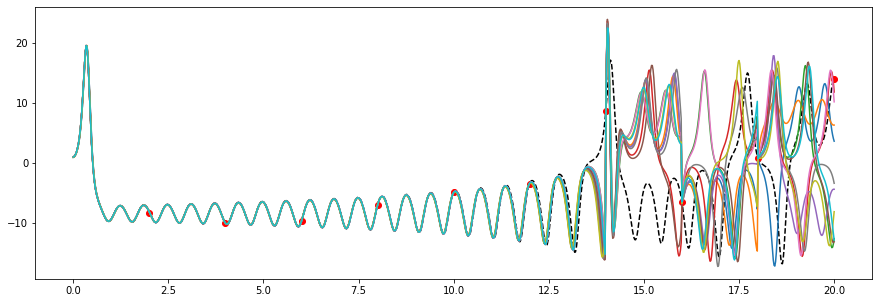

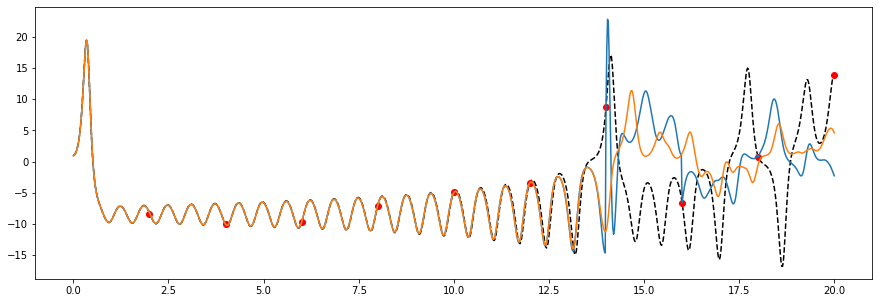

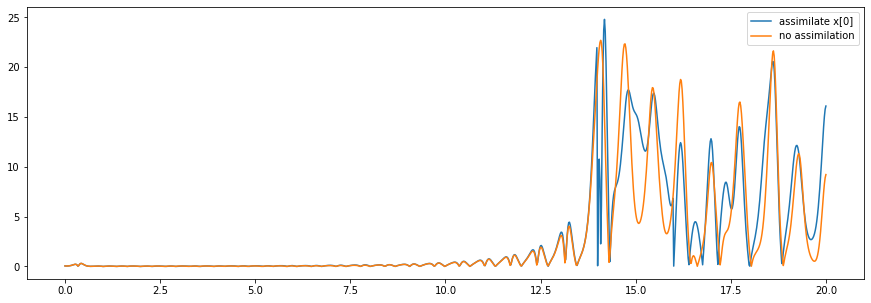

In [26]:
N = 10

x_b0 = np.ones(3) + np.random.normal(0, 0.05, 3)
X_b0 = np.tile(x_b0, (N, 1)).T + np.random.normal(0, 0.05, (3, N))

X_b = np.empty([len(t), 3, N])


### This builds our guestimate of the error covariances from the ensemble

def C(X):
    Xmean = np.mean(X, axis=1)
    A = X - np.tile(Xmean, (N, 1)).T
    return A.dot(A.T)/(N-1)

### Solve our ensemble system by integrating forward,
### estimating the stats, assimilating then carrying forward again

X_b[:101, ...] = odeint(f, X_b0.ravel(), t[:101]).reshape(101, 3, N)
X_f = odeint(f, X_b0.ravel(), t).reshape(1001, 3, N)
for i in range(1, 10):
    Z = np.tile(y[i-1], (N, 1)).T - H.dot(X_b[i*100, :, :]) + np.random.normal(0, 0.1, (1, N))
    B = C(X_b[i*100, :, :])
    K = B.dot(H.T)*inv((H.dot(B.dot(H.T))+0.1**2))
    X_a = X_b[i*100, :, :] + K.dot(Z)
    X_b[i*100:(i+1)*100+1, ...] = odeint(f, X_a.ravel(), t[i*100:(i+1)*100+1]).reshape(101, 3, N)

t_y=0

### Plot everythin
    
p.figure(figsize=(15,5))
p.plot(t, x_t[:, 0], 'k--')
p.plot(t[100::100], y,'ro')
p.plot(t, X_b[:, 0,],)
p.figure(figsize=(15,5))
p.plot(t, x_t[:, 0], 'k--')
p.plot(t[100::100], y,'ro')
p.plot(t, np.mean(X_b[:, 0, :], axis=1),)
p.plot(t, np.mean(X_f[:, 0, :], axis=1),)
p.figure(figsize=(15,5))
p.plot(t, (abs(np.mean(X_b[:, 0, :], axis=1)-x_t[:, 0])), label='assimilate x[0]')
p.plot(t, (abs(np.mean(X_f[:, 0, :], axis=1)-x_t[:, 0])), label='no assimilation')
p.legend()

    

## Summary

we have:

- revised some basic probability theory and statistics
- understood the basics of optimal/statitstical interpolation of data with known error characteristics
- seen some of the key data assimilation methods used in operational data assimilation and learned some of their key properties. 


## Further Reading

- Roger Daley - [Atmospheric Data Analysis](https://library-search.imperial.ac.uk/permalink/f/tlmp2g/44IMP_ALMA_DS2182612100001591)
- Eugenia Kalnay - [Atmospheric modeling, data assimilation and predictability](https://library-search.imperial.ac.uk/permalink/f/tlmp2g/44IMP_ALMA_DS2172926740001591)
- Andrew Bennett - [Inverse Modeling of the Ocean and Atmosphere](https://library-search.imperial.ac.uk/permalink/f/tlmp2g/44IMP_ALMA_DS2139340310001591)
- F. Bouttier and P. Courtier : [Data assimilation concepts and methods](https://www.ecmwf.int/en/elibrary/16928-data-assimilation-concepts-and-methods) - ECMWF Lecture notes
- W. Press, S. Teukolsky, W. Vetterin & B. Flannery - [Numerical Recipes: the art of scientific computing](https://library-search.imperial.ac.uk/permalink/f/1icbe9u/44IMP_ALMA_DS2149880250001591) (for a deep discussion of random number generators) also online  [here](http://numerical.recipes/book/book.html).
- A. J. Geer [Learning earth system modelsfrom observations: machinelearning or data assimilation?](https://royalsocietypublishing.org/doi/pdf/10.1098/rsta.2020.0089)